# Análise de Cadeia de Suprimentos - Supply Chain Analytics

Previsão de risco de atraso na entrega de pedidos e segmentação de clientes para uma empresa de *E-commerce*.

Esse é um projeto de classificação e clusterização.

O conjunto de dados utilizado está disponível <a href='https://data.mendeley.com/datasets/8gx2fvg2k6/5'>neste link</a>.

## 1. Entendimento do Negócio

*Supply Chain* é um termo em inglês que significa cadeia de suprimentos. Esse termo se refere aos diversos caminhos por quais os produtos passam, desde a retirada da matéria-prima até a entrega ao consumidor final.

Com o crescimento das vendas online, um problema recorrente nesse processo é o atraso na entrega dos pedidos. Para qualquer empresa, poder calcular o risco de uma entrega atrasar é extremamente importante. 

Imagine um cliente que faz uma compra online, preenche todos os dados relativos à compra, e recebe uma estimativa de prazo da entrega do produto. A empresa então, poderia usar um sistema a fim de prever o risco dessa entrega atrasar e caso necessário tomar medidas pró-ativas para evitar esse problema, gerando um aumento na satisfação do cliente e evitando custos extras com transporte e devoluções.

Outro fator importante para qualquer negócio é a segmentação de seus clientes. Por meio dela, a empresa conseguirá conhecer melhor o público que deseja atingir, se adequar a ele e oferecer uma experiência personalizada, fazendo com que se sintam ainda mais valorizados.

Pois bem, nesse projeto, nossos objetivos são justamente atender esses dois fatores. Iremos desenvolver um modelo capaz de prever o risco de atraso na entrega dos pedidos e também realizaremos a segmentação dos clientes da empresa.

### 1.1 Premissas do Negócio

Nosso cliente é uma empresa de *E-commerce* que oferece em seu site diferentes tipos de produtos, desde peças de vestuário até aparelhos eletrônicos. 

A empresa possui clientes em todo o mundo, e além disso, também é a responsável por realizar o transporte dos pedidos.

Um dos principais desafios da companhia é a gestão dos pedidos. Atualmente, mais de 50% dos pedidos são entregues de forma atrasada. 

Com a criação de um modelo capaz de prever esse atraso, a empresa espera tornar seu atendimento mais eficaz, garantindo uma maior satisfação de seus clientes e elevando sua competitividade no mercado.

### 1.2 Dicionário de Dados

Em relação ao conjunto de dados, as seguintes informações foram disponibilizadas:

- Os dados estão em formato estruturado e serão disponibilizados em um arquivo "csv".
- A variável **`Late_delivery_risk`** é a variável target.

Além disso, também foi disponibilizado o dicionário de dados:

* **`Type`**: tipo do pagamento realizado pelo cliente: 
    - CASH. 
    - DEBIT.
    - PAYMENT.
    - TRANSFER.
* **`Days for shipping (real)`**: período levado para realizar a entrega do pedido (em dias).
* **`Days for shipment (scheduled)`**: prazo estimado para a entrega do pedido (em dias).
* **`Benefit per order`**: valor do lucro/prejuízo do pedido.
* **`Sales per customer`**: valor total do pedido após o desconto.
* **`Delivery Status`**: status da entrega do pedido: 
    - Advance shipping: pedido entregue de forma antecipada.
    - Late delivery: pedido entregue de forma atrasada.
    - Shipping canceled: pedido que teve seu envio cancelado. 
    - Shipping on time: pedido entregue dentro do prazo estimado.
* **`Late_delivery_risk`**: risco de atraso na entraga do pedido:
    - 1: há risco de atraso.
    - 0: não há risco de atraso.
* **`Category Id`**: código de identificação da categoria do produto.
* **`Category Name`**: descrição da categoria do produto.
* **`Customer Email`**: email do cliente.
* **`Customer Fname`**: primeiro nome do cliente.
* **`Customer Id`**: ID do cliente.
* **`Customer Lname`**: sobrenome do cliente.
* **`Customer Password`**: senha do cliente.
* **`Customer Segment`**: categoria de cliente: 
    - Consumer.
    - Corporate.
    - Home Office. 
* **`Department Id`**: código de identificação do departamento do produto.
* **`Department Name`**: nome do departamento do produto.
* **`Latitude`**: latitude da localização do cliente.
* **`Longitude`**: longitude da localização do clinte.
* **`Market`**: "mercado" para onde o pedido será enviado: 
    - Africa. 
    - Europe.
    - LATAM.
    - Pacific Asia.
    - USCA.
* **`Order City`**: cidade de destino do pedido.
* **`Order Country`**:* país de destino do pedido.
* **`Order Customer Id`**: Id do cliente.
* **`order date (DateOrders)`**: data que o pedido foi realizado. 
* **`Order Id`**: código da encomenda.
* **`Order Item Cardprod Id`**: código do produto gerado através do leitor RFID.
* **`Order Item Discount`**: valor do desconto.
* **`Order Item Discount Rate`**: porcentagem de desconto.
* **`Order Item Id`**: código de identificação do pedido.
* **`Order Item Product Price`**: preço do produto sem desconto.
* **`Order Item Profit Ratio`**: taxa de lucro.
* **`Order Item Quantity`**: quantidade do produto no pedido.
* **`Sales`**: valor do pedido sem desconto.
* **`Order Item Total`**: valor total por pedido.
* **`Order Profit Per Order`**: lucro do pedido.
* **`Order Region`**: região de destino do pedido.
* **`Order State`**: estado de destino do pedido.
* **`Order Status`**: status do pedido: 
    - COMPLETE.
    - PENDING.
    - CLOSED.
    - PENDING_PAYMENT.
    - CANCELED.
    - PROCESSING.
    - SUSPECTED_FRAUD.
    - ON_HOLD.
    - PAYMENT_REVIEW.
* **`Order Zipcode`**: CEP de destino do pedido.
* **`Product Card Id`**: código de identificação do produto.
* **`Product Category Id`**: código de identificação da categoria do produto.
* **`Product Description`**: descrição do produto.
* **`Product Image`**: link de compra do produto.
* **`Product Name`**: nome do produto.
* **`Product Price`**: preço do produto.
* **`Product Status`**: produto em estoque:
   - 1: indisponível. 
   - 0: disponível.
* **`Shipping date (DateOrders)`**: data e hora exatas do envio do pedido.
* **`Shipping Mode`**: método de envio: 
    - Standard Class.
    - First Class.
    - Second Class.
    - Same Day.

### 1.3 Estratégia da Solução

Como estratégia para a solução dos problemas, definimos as seguintes etapas: 

- **1. Entendimento do Negócio:** essa etapa é basicamente o que vimos até aqui: especificamos o problema de negócio, entendemos a necessidade do cliente e definimos os objetivos.


- **2. Entendimento dos Dados:** aqui, iremos realizar um primeiro tratamento nos dados, identificando valores ausentes e excluindo variáveis irrelevantes e duplicadas. Além disso, também iremos realizar uma análise detalhada em cada variável a fim de entender o que elas representam. Por fim, realizaremos a seleção das melhores variáveis para a modelagem.


- **3. Pré-Processamento dos Dados:** nesta etapa, nosso objetivo é preparar os dados da etapa anterior para aplicação do modelo preditivo. Aqui, iremos realizar a divisão do conjunto em treino e teste, a codificação das variáveis, e a padronização dos dados.


- **4. Modelagem Preditiva:** focaremos em solucionar o primeiro problema de negócio da empresa através da criação e avaliação de um modelo preditivo.


- **5. Segmentação de Clientes**: através da análise RFM, iremos segmentar os clientes da empresa.


- **6. Conclusões Finais:** por fim, entregaremos o resultado final do projeto.

## 2. Entendimento dos Dados

Vamos iniciar o projeto carregando as bibliotecas necessárias e o conjunto de dados.

### 2.1 Bibliotecas Necessárias

In [1]:
# Filtragem das mensagens de avisos.
import warnings
warnings.filterwarnings('ignore') 

# Manipulação de dados.
import datetime as dt
import numpy as np
import pandas as pd

# Criação de gráficos.
import matplotlib.pyplot as plt
import seaborn as sns

# Pré-processamento dos dados.
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Algoritmos de Machine Learning.
from sklearn.base import BaseEstimator
from sklearn.linear_model import LogisticRegression

# Treinamento dos modelos.
from sklearn.model_selection import cross_val_predict, cross_val_score, train_test_split

# Métricas para avaliação dos modelos.
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score, precision_score, recall_score

print('Bibliotecas carregadas com sucesso!')

Bibliotecas carregadas com sucesso!


In [2]:
# Versão da linguagem Python.
from platform import python_version
print('Versão da linguagem Python:', python_version())

Versão da linguagem Python: 3.7.3


In [3]:
# Versão dos pacotes.
%reload_ext watermark
%watermark --iversions

seaborn   : 0.11.2
matplotlib: 3.5.1
pandas    : 1.3.5
numpy     : 1.21.5



In [4]:
# Configuração do notebook.

# Plotagens.
from matplotlib import rcParams
rcParams['figure.figsize'] = 15, 10
rcParams['lines.linewidth'] = 3

# Estilo dos gráficos.
plt.style.use('ggplot')

# Configuração Dataframe.
pd.set_option('display.max_columns', None)

### 2.2 Tratamento Inicial dos Dados

Nessa etapa, nosso objetivo é realizar uma análise geral no dataset a fim de tratar possíveis inconsistências nos dados.

In [5]:
# Carregando o conjunto de dados.
df = pd.read_csv('data/DataCoSupplyChainDatasetMod.csv', encoding = 'latin1', index_col = 0)

Criar uma cópia do dataset é uma boa prática para não perdermos o conteúdo original durante a manipulação dos dados.

In [6]:
# Cópia do dataset.
df1 = df.copy()

In [7]:
# Visualizando o dataframe.
df1.head()

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer Email,Customer Fname,Customer Id,Customer Lname,Customer Password,Customer Segment,Department Id,Department Name,Latitude,Longitude,Market,Order City,Order Country,Order Customer Id,order date (DateOrders),Order Id,Order Item Cardprod Id,Order Item Discount,Order Item Discount Rate,Order Item Id,Order Item Product Price,Order Item Profit Ratio,Order Item Quantity,Sales,Order Item Total,Order Profit Per Order,Order Region,Order State,Order Status,Order Zipcode,Product Card Id,Product Category Id,Product Description,Product Image,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode
0,DEBIT,3,4,91.250000,314.640015,Advance shipping,0,73,Sporting Goods,XXXXXXXXX,Cally,20755,Holloway,XXXXXXXXX,Consumer,2,Fitness,18.251453,-66.037056,Pacific Asia,Bekasi,Indonesia,20755,1/31/2018 22:56,77202,1360,13.110000,0.04,180517,327.75,0.29,1,327.75,314.640015,91.250000,Southeast Asia,Java Occidental,COMPLETE,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,2/3/2018 22:56,Standard Class
1,TRANSFER,5,4,-249.089996,311.359985,Late delivery,1,73,Sporting Goods,XXXXXXXXX,Irene,19492,Luna,XXXXXXXXX,Consumer,2,Fitness,18.279451,-66.037064,Pacific Asia,Bikaner,India,19492,1/13/2018 12:27,75939,1360,16.389999,0.05,179254,327.75,-0.80,1,327.75,311.359985,-249.089996,South Asia,RajastÃ¡n,PENDING,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/18/2018 12:27,Standard Class
2,CASH,4,4,-247.779999,309.720001,Shipping on time,0,73,Sporting Goods,XXXXXXXXX,Gillian,19491,Maldonado,XXXXXXXXX,Consumer,2,Fitness,37.292233,-121.881279,Pacific Asia,Bikaner,India,19491,1/13/2018 12:06,75938,1360,18.030001,0.06,179253,327.75,-0.80,1,327.75,309.720001,-247.779999,South Asia,RajastÃ¡n,CLOSED,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/17/2018 12:06,Standard Class
3,DEBIT,3,4,22.860001,304.809998,Advance shipping,0,73,Sporting Goods,XXXXXXXXX,Tana,19490,Tate,XXXXXXXXX,Home Office,2,Fitness,34.125946,-118.291016,Pacific Asia,Townsville,Australia,19490,1/13/2018 11:45,75937,1360,22.940001,0.07,179252,327.75,0.08,1,327.75,304.809998,22.860001,Oceania,Queensland,COMPLETE,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/16/2018 11:45,Standard Class
4,PAYMENT,2,4,134.210007,298.250000,Advance shipping,0,73,Sporting Goods,XXXXXXXXX,Orli,19489,Hendricks,XXXXXXXXX,Corporate,2,Fitness,18.253769,-66.037048,Pacific Asia,Townsville,Australia,19489,1/13/2018 11:24,75936,1360,29.500000,0.09,179251,327.75,0.45,1,327.75,298.250000,134.210007,Oceania,Queensland,PENDING_PAYMENT,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/15/2018 11:24,Standard Class


In [8]:
# Dimensão do dataframe.
df1.shape

(180519, 48)

Temos 180.519 registros e 48 variáveis.

In [9]:
# Informações do dataframe.
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 180519 entries, 0 to 180518
Data columns (total 48 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Type                           180519 non-null  object 
 1   Days for shipping (real)       180519 non-null  int64  
 2   Days for shipment (scheduled)  180519 non-null  int64  
 3   Benefit per order              180519 non-null  float64
 4   Sales per customer             180519 non-null  float64
 5   Delivery Status                180519 non-null  object 
 6   Late_delivery_risk             180519 non-null  int64  
 7   Category Id                    180519 non-null  int64  
 8   Category Name                  180519 non-null  object 
 9   Customer Email                 180519 non-null  object 
 10  Customer Fname                 180519 non-null  object 
 11  Customer Id                    180519 non-null  int64  
 12  Customer Lname                

Algumas variáveis possuem dados ausentes. 

Vamos verificá-los com mais detalhes.

In [10]:
# Valores ausentes.
df1.isnull().sum()

Type                                  0
Days for shipping (real)              0
Days for shipment (scheduled)         0
Benefit per order                     0
Sales per customer                    0
Delivery Status                       0
Late_delivery_risk                    0
Category Id                           0
Category Name                         0
Customer Email                        0
Customer Fname                        0
Customer Id                           0
Customer Lname                        8
Customer Password                     0
Customer Segment                      0
Department Id                         0
Department Name                       0
Latitude                              0
Longitude                             0
Market                                0
Order City                            0
Order Country                         0
Order Customer Id                     0
order date (DateOrders)               0
Order Id                              0


Como vemos, temos 3 variáveis com registros ausentes, abaixo segue a estratégia de tratamento para cada uma delas:

- **`Customer Lname:`** registros ausentes serão descartados e uma nova variável será criada.

- **`Order Zipcode:`** variável será descartada pois possui muitos valores ausentes.

- **`Product Description:`** variável será descartada pois não possui registros.

In [11]:
# Tratando valores ausentes.
df1 = df1.dropna(subset = ['Customer Lname'])

Vamos "unir" as variáveis **`Customer Fname`** e **`Customer Lname`**, criando a **`Customer Name`**.

In [12]:
# Nova variável.
df1['Customer Name'] = df1['Customer Fname'].astype(str) + df1['Customer Lname'].astype(str)

In [13]:
# Excluindo as variáveis.
df1 = df1.drop(['Customer Fname', 
                'Customer Lname', 
                'Order Zipcode', 
                'Product Description'], axis = 1)

Pronto! Já tratamos as variáveis que possuiam dados ausentes. 

Agora, baseado no dicionário de dados, iremos descartar algumas variáveis que julgamos irrelevantes para a análise, são elas:

- **`Customer Email`**: possui apenas dados criptografados.
- **`Customer Password`**: possui apenas dados criptografados.
- **`Latitude`**: variável não será utilizada.
- **`Longitude`**: variável não será utilizada.
- **`Product Image`**: variável não será utilizada.
- **`shipping date (DateOrders)`**: variável não será utilizada.

In [14]:
# Excluindo as variáveis.
df1 = df1.drop(['Customer Email', 
                'Customer Password', 
                'Latitude', 
                'Longitude', 
                'Product Image', 
                'shipping date (DateOrders)'], axis = 1)

In [15]:
# Visualizando o dataframe.
df1.head()

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer Id,Customer Segment,Department Id,Department Name,Market,Order City,Order Country,Order Customer Id,order date (DateOrders),Order Id,Order Item Cardprod Id,Order Item Discount,Order Item Discount Rate,Order Item Id,Order Item Product Price,Order Item Profit Ratio,Order Item Quantity,Sales,Order Item Total,Order Profit Per Order,Order Region,Order State,Order Status,Product Card Id,Product Category Id,Product Name,Product Price,Product Status,Shipping Mode,Customer Name
0,DEBIT,3,4,91.250000,314.640015,Advance shipping,0,73,Sporting Goods,20755,Consumer,2,Fitness,Pacific Asia,Bekasi,Indonesia,20755,1/31/2018 22:56,77202,1360,13.110000,0.04,180517,327.75,0.29,1,327.75,314.640015,91.250000,Southeast Asia,Java Occidental,COMPLETE,1360,73,Smart watch,327.75,0,Standard Class,CallyHolloway
1,TRANSFER,5,4,-249.089996,311.359985,Late delivery,1,73,Sporting Goods,19492,Consumer,2,Fitness,Pacific Asia,Bikaner,India,19492,1/13/2018 12:27,75939,1360,16.389999,0.05,179254,327.75,-0.80,1,327.75,311.359985,-249.089996,South Asia,RajastÃ¡n,PENDING,1360,73,Smart watch,327.75,0,Standard Class,IreneLuna
2,CASH,4,4,-247.779999,309.720001,Shipping on time,0,73,Sporting Goods,19491,Consumer,2,Fitness,Pacific Asia,Bikaner,India,19491,1/13/2018 12:06,75938,1360,18.030001,0.06,179253,327.75,-0.80,1,327.75,309.720001,-247.779999,South Asia,RajastÃ¡n,CLOSED,1360,73,Smart watch,327.75,0,Standard Class,GillianMaldonado
3,DEBIT,3,4,22.860001,304.809998,Advance shipping,0,73,Sporting Goods,19490,Home Office,2,Fitness,Pacific Asia,Townsville,Australia,19490,1/13/2018 11:45,75937,1360,22.940001,0.07,179252,327.75,0.08,1,327.75,304.809998,22.860001,Oceania,Queensland,COMPLETE,1360,73,Smart watch,327.75,0,Standard Class,TanaTate
4,PAYMENT,2,4,134.210007,298.250000,Advance shipping,0,73,Sporting Goods,19489,Corporate,2,Fitness,Pacific Asia,Townsville,Australia,19489,1/13/2018 11:24,75936,1360,29.500000,0.09,179251,327.75,0.45,1,327.75,298.250000,134.210007,Oceania,Queensland,PENDING_PAYMENT,1360,73,Smart watch,327.75,0,Standard Class,OrliHendricks


Também podemos ver que aparentemente temos variáveis com dados idênticos:

- **`Benefit per order`** possui os mesmos registros que **`Order Profit Per Order`**.
- **`Sales per customer`** possui os mesmos registros que **`Order Item Total`**.
- **`Customer Id`** possui os mesmos registros que **`Order Customer Id`**.
- **`Product Card Id`** possui os mesmos registros que **`Order Item Cardprod Id`**.
- **`Product Price`** possui os mesmos registros que **`Order Item Product Price`**.
- **`Category Id`** possui os mesmos registros que **`Product Category Id`**.

Antes de excluírmos essas variáveis, vamos nos certificar que elas estão realmente duplicadas.

In [16]:
# Comparando as variáveis.
df1['Benefit per order'].equals(df1['Order Profit Per Order'])
df1['Sales per customer'].equals(df1['Order Item Total'])
df1['Customer Id'].equals(df1['Order Customer Id'])
df1['Product Card Id'].equals(df1['Order Item Cardprod Id'])
df1['Product Price'].equals(df1['Order Item Product Price'])
df1['Category Id'].equals(df1['Product Category Id'])

True

A saída *True* indica que as variáveis realmente estão duplicadas. 

In [17]:
# Excluindo as variáveis.
df1 = df1.drop(['Order Profit Per Order', 
                'Order Item Total', 
                'Order Customer Id', 
                'Order Item Cardprod Id', 
                'Order Item Product Price', 
                'Product Category Id'], axis = 1)

Realizamos um primeiro tratamento no conjunto de dados. 

Vamos criar uma nova cópia para seguirmos com a análise.

In [18]:
# Cópia do dataframe.
df2 = df1.copy()

### 2.3 Análise Exploratória 

Nesta etapa, iniciaremos uma análise mais detalhada em cada variável com o objetivo de extrair insights do negócio.

In [19]:
# Visualizando o dataframe.
df2.head()

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer Id,Customer Segment,Department Id,Department Name,Market,Order City,Order Country,order date (DateOrders),Order Id,Order Item Discount,Order Item Discount Rate,Order Item Id,Order Item Profit Ratio,Order Item Quantity,Sales,Order Region,Order State,Order Status,Product Card Id,Product Name,Product Price,Product Status,Shipping Mode,Customer Name
0,DEBIT,3,4,91.250000,314.640015,Advance shipping,0,73,Sporting Goods,20755,Consumer,2,Fitness,Pacific Asia,Bekasi,Indonesia,1/31/2018 22:56,77202,13.110000,0.04,180517,0.29,1,327.75,Southeast Asia,Java Occidental,COMPLETE,1360,Smart watch,327.75,0,Standard Class,CallyHolloway
1,TRANSFER,5,4,-249.089996,311.359985,Late delivery,1,73,Sporting Goods,19492,Consumer,2,Fitness,Pacific Asia,Bikaner,India,1/13/2018 12:27,75939,16.389999,0.05,179254,-0.80,1,327.75,South Asia,RajastÃ¡n,PENDING,1360,Smart watch,327.75,0,Standard Class,IreneLuna
2,CASH,4,4,-247.779999,309.720001,Shipping on time,0,73,Sporting Goods,19491,Consumer,2,Fitness,Pacific Asia,Bikaner,India,1/13/2018 12:06,75938,18.030001,0.06,179253,-0.80,1,327.75,South Asia,RajastÃ¡n,CLOSED,1360,Smart watch,327.75,0,Standard Class,GillianMaldonado
3,DEBIT,3,4,22.860001,304.809998,Advance shipping,0,73,Sporting Goods,19490,Home Office,2,Fitness,Pacific Asia,Townsville,Australia,1/13/2018 11:45,75937,22.940001,0.07,179252,0.08,1,327.75,Oceania,Queensland,COMPLETE,1360,Smart watch,327.75,0,Standard Class,TanaTate
4,PAYMENT,2,4,134.210007,298.250000,Advance shipping,0,73,Sporting Goods,19489,Corporate,2,Fitness,Pacific Asia,Townsville,Australia,1/13/2018 11:24,75936,29.500000,0.09,179251,0.45,1,327.75,Oceania,Queensland,PENDING_PAYMENT,1360,Smart watch,327.75,0,Standard Class,OrliHendricks


#### 2.3.1 Type

Essa é a primeira variável e refere-se ao tipo do pagamento realizado pelo cliente.

In [20]:
# Registros da variável.
df2[['Type']].value_counts()

Type    
DEBIT       69292
TRANSFER    49880
PAYMENT     41723
CASH        19616
dtype: int64

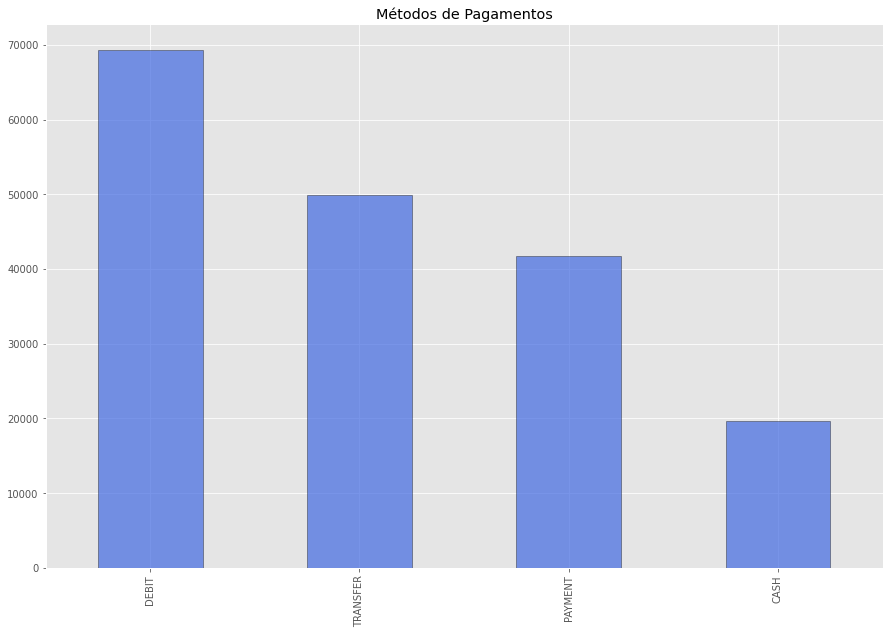

In [21]:
# Métodos de pagamentos.
df2['Type'].value_counts().plot.bar(title = 'Métodos de Pagamentos',
                                    ec = 'k', 
                                    alpha = .7, 
                                    color = 'royalblue');

- A maioria dos clientes optam por pagar suas compras via débito.

Vamos verificar quais são os métodos de pagamentos mais utilizados em cada região.

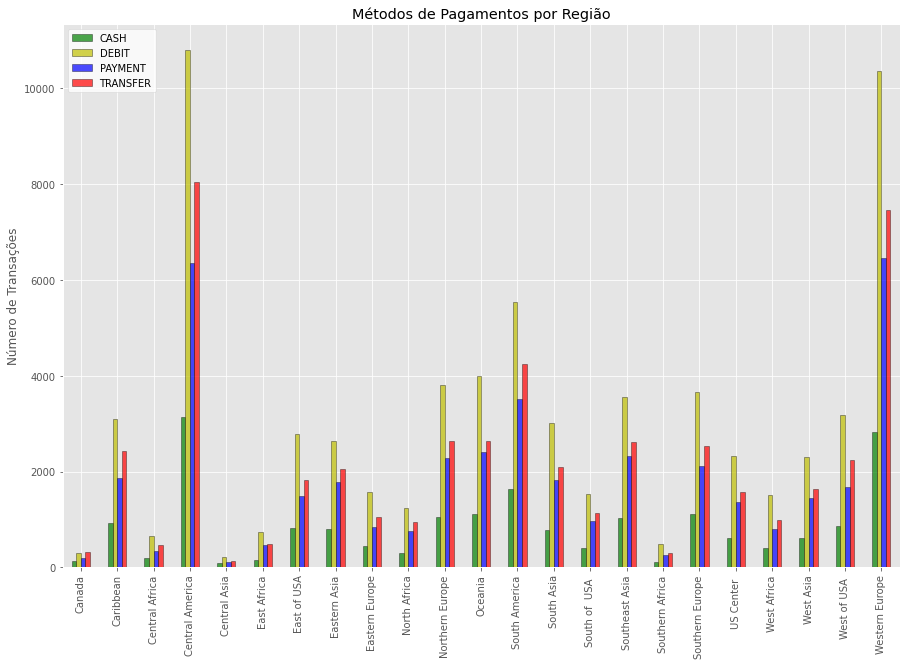

In [22]:
# Métodos de pagamentos por região.

# Preparando os dados.
type_region = df2.groupby('Type')['Order Region'].value_counts().unstack(0)

# Plotagem.
type_region.plot.bar(title = 'Métodos de Pagamentos por Região', 
                     ec = 'k', 
                     alpha = .7, 
                     color = ['g', 'y', 'b', 'r'],
                     xlabel = '', 
                     ylabel = 'Número de Transações')
plt.legend(['CASH', 'DEBIT', 'PAYMENT', 'TRANSFER'], loc = 'upper left', facecolor = 'white');

- Praticamente em todas as regiões o débito é o método preferido, enquanto o dinheiro é o menos utilizado.

#### 2.3.2 Days for shipping (real)

Essa variável indica o período, em dias, que a empresa levou para concluir a entrega do pedido ao cliente. 

In [23]:
# Registros da variável.
df2[['Days for shipping (real)']].value_counts()

Days for shipping (real)
2                           56614
3                           28764
6                           28723
4                           28512
5                           28161
0                            5080
1                            4657
dtype: int64

Todas as entregas foram realizadas entre 0 e 6 dias. 

#### 2.3.3 Days for shipment (scheduled)

Essa variável indica o prazo, em dias, que a empresa estimou para concluir a entrega do produto.

In [24]:
# Registros da variável.
df2[['Days for shipment (scheduled)']].value_counts()

Days for shipment (scheduled)
4                                107747
2                                 35214
1                                 27813
0                                  9737
dtype: int64

Temos prazos de 0, 1, 2 e 4 dias. 

Observe que a grande maioria dos pedidos recebem um prazo de 4 dias para a entrega. 

Podemos filtrar o dataframe, buscando por exemplo, os pedidos que tinham prazo estipulado de 4 dias e mesmo assim atrasaram.

In [25]:
# Pedidos entregues após o prazo estipulado de 4 dias.
Late_delivery = df2[(df2['Days for shipment (scheduled)'] == 4) & (df2['Days for shipping (real)'] > 4)]
Late_delivery.head()

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer Id,Customer Segment,Department Id,Department Name,Market,Order City,Order Country,order date (DateOrders),Order Id,Order Item Discount,Order Item Discount Rate,Order Item Id,Order Item Profit Ratio,Order Item Quantity,Sales,Order Region,Order State,Order Status,Product Card Id,Product Name,Product Price,Product Status,Shipping Mode,Customer Name
1,TRANSFER,5,4,-249.089996,311.359985,Late delivery,1,73,Sporting Goods,19492,Consumer,2,Fitness,Pacific Asia,Bikaner,India,1/13/2018 12:27,75939,16.389999,0.05,179254,-0.80,1,327.75,South Asia,RajastÃ¡n,PENDING,1360,Smart watch,327.75,0,Standard Class,IreneLuna
5,TRANSFER,6,4,18.580000,294.980011,Shipping canceled,0,73,Sporting Goods,19488,Consumer,2,Fitness,Pacific Asia,Toowoomba,Australia,1/13/2018 11:03,75935,32.779999,0.10,179250,0.06,1,327.75,Oceania,Queensland,CANCELED,1360,Smart watch,327.75,0,Standard Class,KimberlyFlowers
21,TRANSFER,5,4,82.300003,304.809998,Late delivery,1,73,Sporting Goods,19472,Corporate,2,Fitness,Pacific Asia,Jabalpur,India,1/13/2018 5:27,75919,22.940001,0.07,179234,0.27,1,327.75,South Asia,Madhya Pradesh,PENDING,1360,Smart watch,327.75,0,Standard Class,AlmaConley
30,DEBIT,6,4,73.419998,262.200012,Late delivery,1,73,Sporting Goods,19463,Consumer,2,Fitness,Pacific Asia,Guilin,China,1/13/2018 2:18,75910,65.550003,0.20,179225,0.28,1,327.75,Eastern Asia,Guangxi,ON_HOLD,1360,Smart watch,327.75,0,Standard Class,TeaganRomero
31,DEBIT,5,4,113.070000,245.809998,Late delivery,1,73,Sporting Goods,19462,Consumer,2,Fitness,Pacific Asia,Delhi,India,1/13/2018 1:57,75909,81.940002,0.25,179224,0.46,1,327.75,South Asia,Delhi,COMPLETE,1360,Smart watch,327.75,0,Standard Class,JoanWilder


Observe que os pedidos atrasados são indicados pela variável **`Delivery Status`**.

#### 2.3.4 Benefit per order

Essa variável indica o lucro/prejuízo gerado pelo pedido.

In [26]:
# Estatísticas da variável.
df2[['Benefit per order']].describe()

,Benefit per order
count,180511.000000
mean,21.971959
std,104.433086
min,-4274.979980
25%,7.000000
50%,31.520000
75%,64.800003
max,911.799988


Repare que temos valores negativos nessa variável, o que indica que alguns pedidos estão gerando perda de receita para a empresa. 

Vamos verificar quais são os produtos que causam esse efeito.

In [27]:
# Registros negativos.
loss = df2[(df2['Benefit per order'] < 0)]

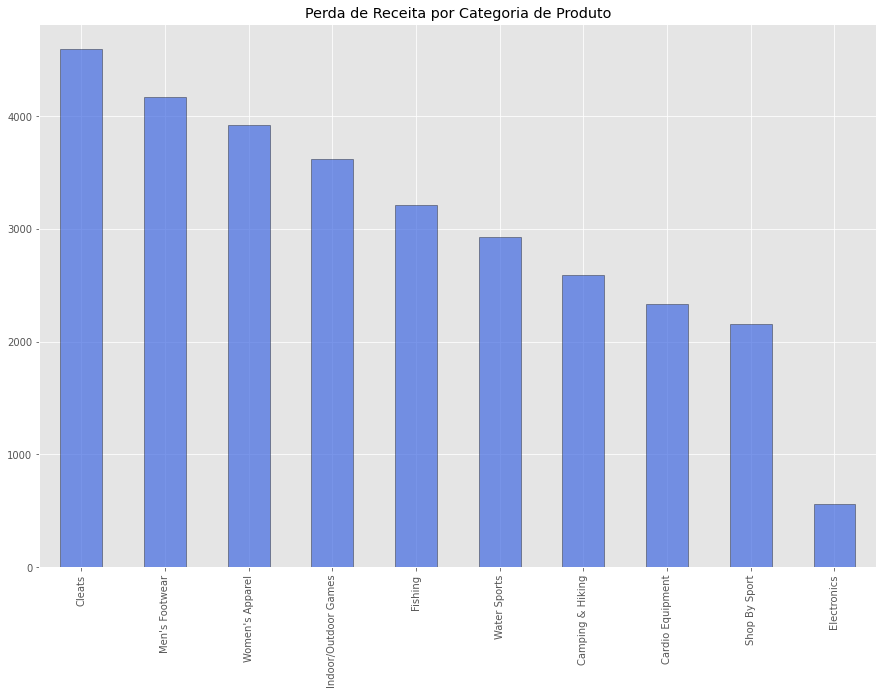

In [28]:
# Perda de receita por categoria.
loss['Category Name'].value_counts().nlargest(10).plot.bar(title = 'Perda de Receita por Categoria de Produto',
                                                           ec = 'k', 
                                                           alpha = .7, 
                                                           color = 'royalblue');

- Chuteiras, calçados masculinos e vestuário feminino são as principais categorias envolvendo pedidos que causam prejuízo.

Vamos verificar o valor total dessas perdas.

In [29]:
# Perca total de receitas.
print('Receita total perdida:', loss['Benefit per order'].sum())

Receita total perdida: -3883483.205769753


As perdas totais são de aproximadamente 3,9 milhões, o que é uma quantidade enorme. 

#### 2.3.5 Sales per customer

Variável que indica o valor total do pedido após o desconto.

In [30]:
# Estatísticas da variável.
df2[['Sales per customer']].describe()

,Sales per customer
count,180511.000000
mean,183.101636
std,120.041376
min,7.490000
25%,104.379997
50%,163.990005
75%,247.399994
max,1939.989990


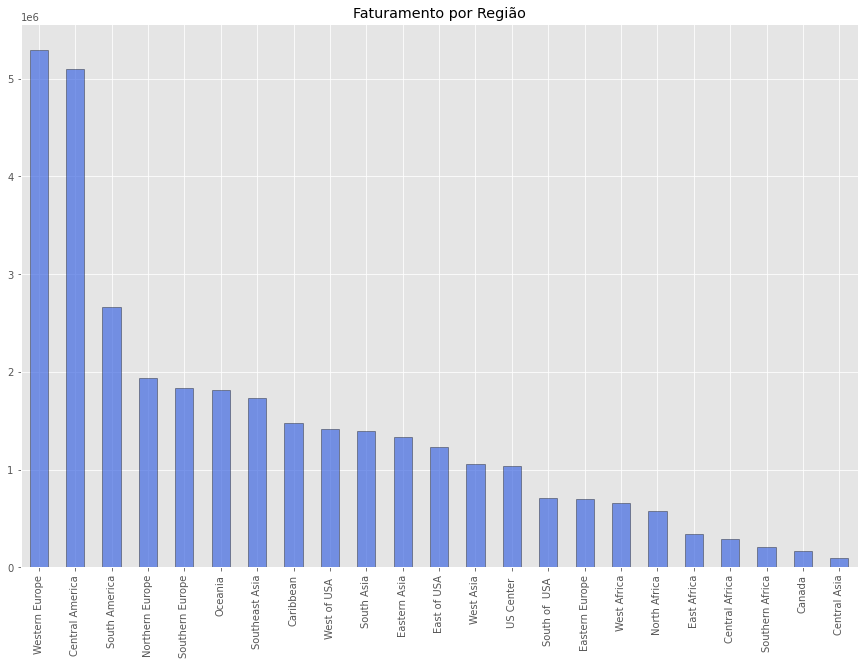

In [31]:
# Faturamento por região.

# Preparando os dados.
sales_cat = df2.groupby('Order Region')

# Plotagem.
sales_cat['Sales per customer'].sum().sort_values(ascending = False).plot.bar(title = 'Faturamento por Região',
                                                                              xlabel = '',
                                                                              ec = 'k', 
                                                                              alpha = .7, 
                                                                              color = 'royalblue');

- A Europa Ocidental e a América Central são as regiões que mais faturaram. 

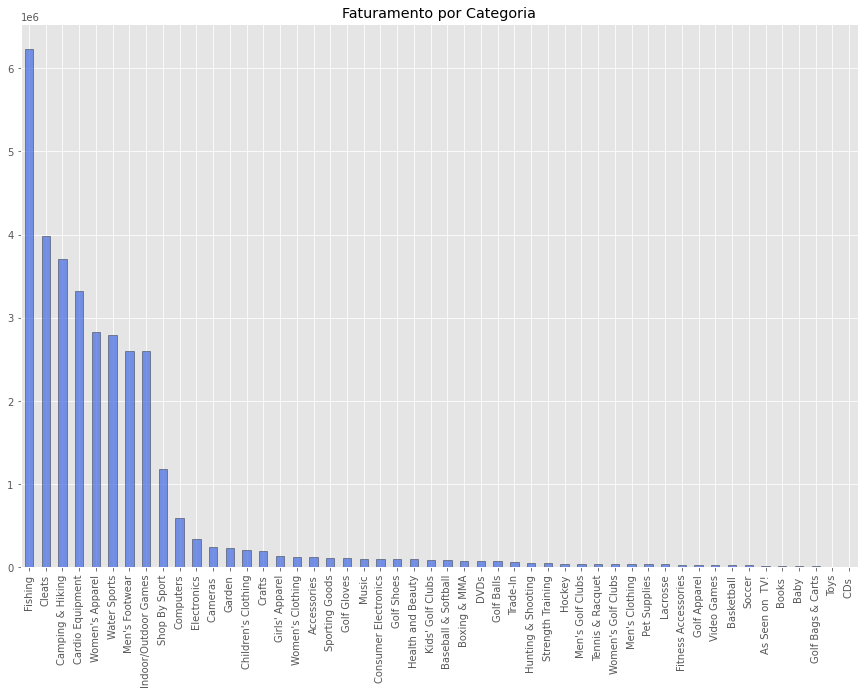

In [32]:
# Faturamento por categoria.

# Preparando os dados.
sales_cat = df2.groupby('Category Name')

# Plotagem.
sales_cat['Sales per customer'].sum().sort_values(ascending = False).plot.bar(title = 'Faturamento por Categoria',
                                                                              xlabel = '',
                                                                              ec = 'k', 
                                                                              alpha = .7, 
                                                                              color = 'royalblue');

Somando todos os pedidos, a categoria *Fishing* é a que possui o maior faturamento.

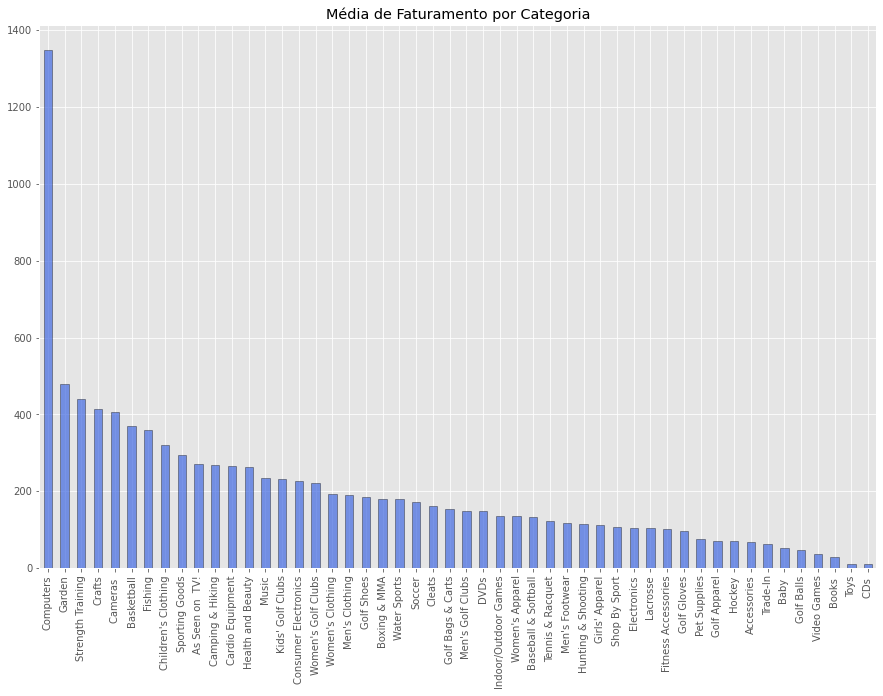

In [33]:
# Média de faturamento por categoria.

# Preparando os dados.
sales_cat = df2.groupby('Category Name')

# Plotagem.
sales_cat['Sales per customer'].mean().sort_values(ascending = False).plot.bar(title = 'Média de Faturamento por Categoria',
                                                                               xlabel = '',
                                                                               ec = 'k', 
                                                                               alpha = .7, 
                                                                               color = 'royalblue');

- A categoria *Computers* é a que possui a maior média de faturamento por produto vendido.

Podemos utilizar a variável **`Product Price`** para verificar o preço médio dos produtos.

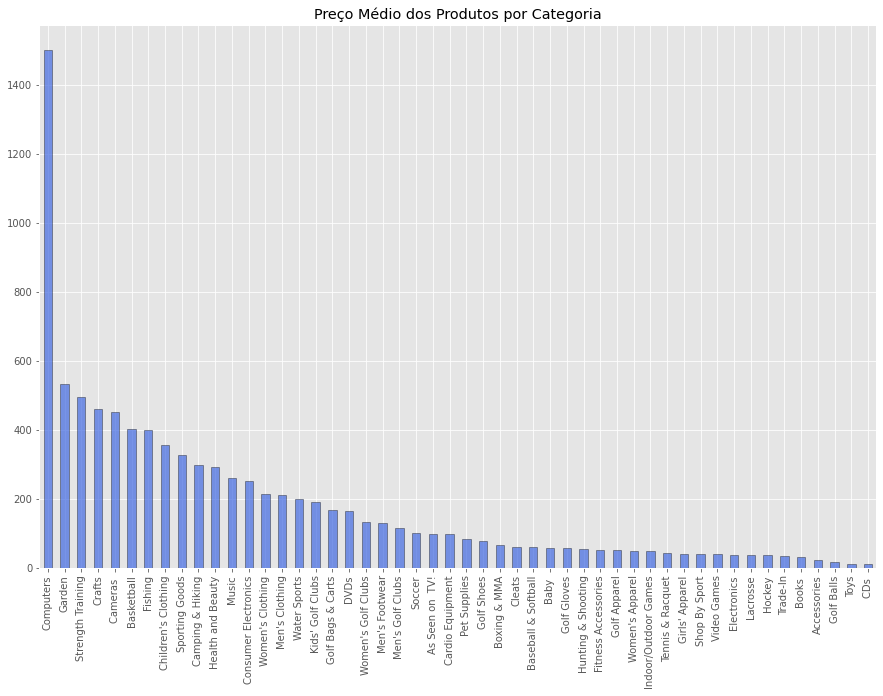

In [34]:
# Preço médio dos produtos por categoria.
sales_cat['Product Price'].mean().sort_values(ascending = False).plot.bar(title = 'Preço Médio dos Produtos por Categoria',
                                                                          xlabel = '',
                                                                          ec = 'k', 
                                                                          alpha = .7, 
                                                                          color = 'royalblue');

- As categorias que possuem os produtos mais caros em média, são as mesmas que possuem as maiores médias de faturamento.

Podemos deduzir que há uma alta correlação positiva entre essas variáveis.

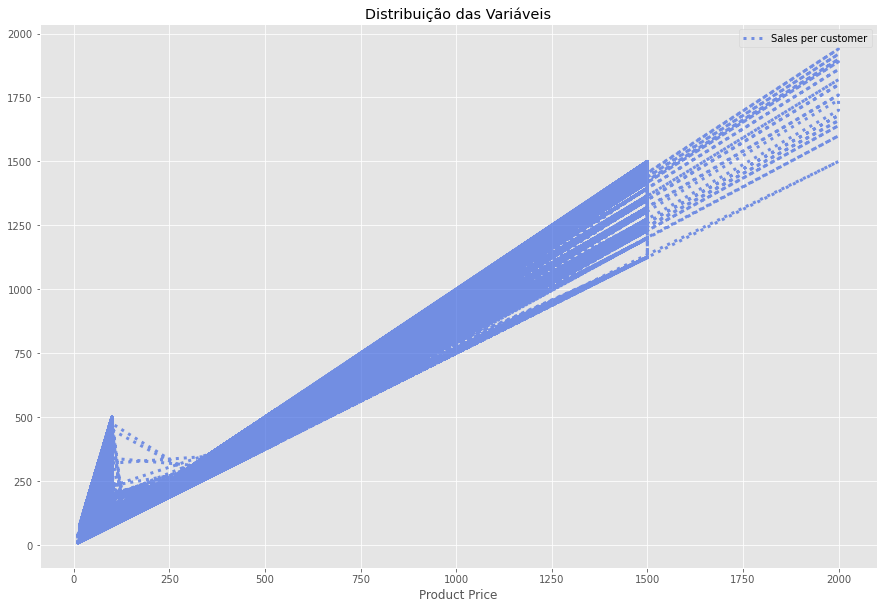

In [35]:
# Distribuição das variáveis.
df2.plot(x = 'Product Price', 
         y = 'Sales per customer', 
         title = 'Distribuição das Variáveis', 
         linestyle = 'dotted', 
         alpha = .7, 
         color = 'royalblue');

#### 2.3.6 Delivery Status

Essa variável indica o status da entrega do pedido, e possui 4 valores possíveis: 

- **Advance shipping**: entrega realizada antes do prazo estipulado.
- **Late delivery**: entrega realizada depois do prazo estipulado.
- **Shipping canceled**: envio cancelado e remarcado.
- **Shipping on time**: entrega realizada dentro do prazo estipulado.

In [36]:
# Registros da variável.
df2[['Delivery Status']].value_counts()

Delivery Status  
Late delivery        98973
Advance shipping     41589
Shipping on time     32195
Shipping canceled     7754
dtype: int64

Dos 180.511 pedidos:

- 98.973 foram entregues de forma atrasada, ou seja, 54,8%.
- Somando os pedidos entregue dentro do prazo e de forma antecipada temos 73.784 pedidos, ou seja, 40,8%.
- Apenas 4,3% dos pedidos tiveram o envio cancelado.

Podemos visualizar essa variável de maneira gráfica.

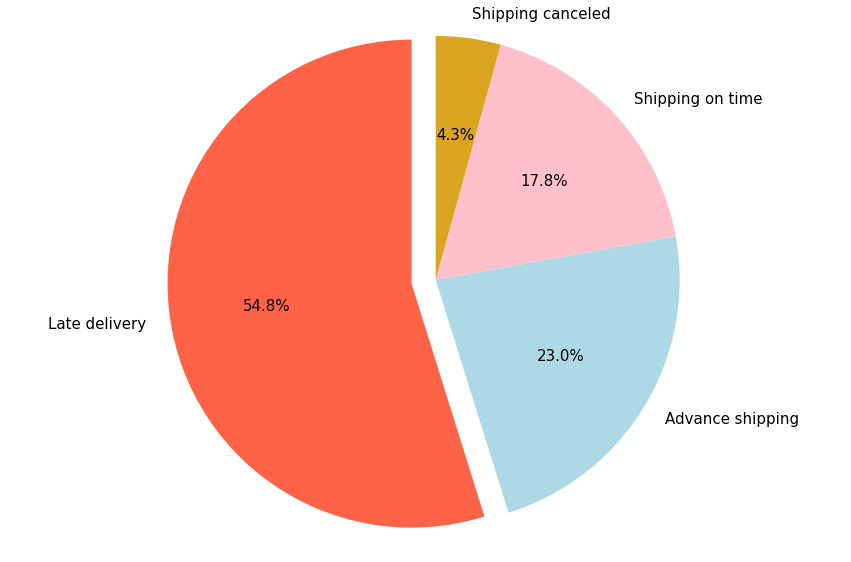

In [37]:
# Status de entrega dos pedidos.
df2['Delivery Status'].value_counts().plot.pie(autopct = '%1.1f%%', 
                                               startangle = 90, 
                                               explode = (0.1, 0, 0, 0), 
                                               colors = ['tomato', 'lightblue', 'pink', 'goldenrod'],
                                               ylabel = '',
                                               fontsize = 15)
plt.axis('equal');

#### 2.3.7 Late_delivery_risk

Essa é a variável target.

Ela indica se há ou não risco de atraso na entrega do pedido.

O número 1 é utilizado para representar a classe positiva e o 0 para a classe negativa.

In [38]:
# Registros da variável.
df2['Late_delivery_risk'].value_counts()

1    98973
0    81538
Name: Late_delivery_risk, dtype: int64

- 98.973 pedidos não cumpriram o prazo estipulado de entrega e esse número é exatamente o mesmo na classe positiva dessa variável, ou seja, todas as encomendas que haviam risco de atrasar, de fato, atrasaram.

#### 2.3.8 Variáveis: 
- **Category Id**
- **Category Name**

Essas são as variáveis de identificação da categoria do produto.

A **`Category Id`** representa o código de identificação e a **`Category Name`** a descrição da categoria.

Vamos verificar se ambas possuem a mesma quantidade de registros únicos.

In [39]:
# Quantidade de Id's das categorias.
len(df2['Category Id'].unique())

51

In [40]:
# Quantidade de descrição das categorias.
len(df2['Category Name'].unique())

50

Temos 51 Id's para 50 descrições, ou seja, temos um código de Id duplicado representando a mesma categoria.

Vamos associar as variáveis para verificarmos.

In [41]:
# Associando as variáveis.
category = df2.copy()
category = category[['Category Id', 'Category Name']]
category = category.drop_duplicates(['Category Id', 'Category Name'])
category = category.groupby('Category Id')['Category Name'].apply(list).reset_index(name = 'Category')

In [42]:
# Visualizando as categorias.
category

,Category Id,Category
0,2,[Soccer]
1,3,[Baseball & Softball]
2,4,[Basketball]
3,5,[Lacrosse]
4,6,[Tennis & Racquet]
5,7,[Hockey]
6,9,[Cardio Equipment]
7,10,[Strength Training]
8,11,[Fitness Accessories]
9,12,[Boxing & MMA]


In [43]:
# Registros da variável.
id_counts = category['Category'].value_counts()
id_counts.value_counts()

1    49
2     1
Name: Category, dtype: int64

Como deduzimos, temos 1 código Id aparecendo 2 vezes.

In [44]:
# Coletando os ID's duplicados.
duple_id = id_counts == 2

# Coletando os índices dos ID's duplicados.
duple_idx = id_counts.index[duple_id]
duple_idx

Index([['Electronics']], dtype='object')

A categoria *Eletronics*, possui o Id duplicado, ela é representada pelo Id 13 e 37.

Antes de realizar qualquer alteração nesses registros, teríamos que verificar com a empresa o porque de haver dois Id's para a mesma descrição. 

Por ora, vamos manter ambas categorias e considerar que, embora tenham a mesma descrição, sejam categorias diferentes.

#### 2.3.9 Variáveis: 
- **Customer Id**  
- **Customer Segment**  

Essas variáveis representam informações sobre os clientes da empresa.

In [45]:
# Visualizando as variáveis.
df2.iloc[:,9:11].head()

,Customer Id,Customer Segment
0,20755,Consumer
1,19492,Consumer
2,19491,Consumer
3,19490,Home Office
4,19489,Corporate


Vamos iniciar contabilizando os registros únicos da variável **`Customer Id`**.

In [46]:
# Quantidade de Id's.
len(df2['Customer Id'].unique())

20644

Temos 20.644 Id's difentes no conjunto de dados.

In [47]:
# Registros da variável.
df2[['Customer Segment']].value_counts()

Customer Segment
Consumer            93503
Corporate           54785
Home Office         32223
dtype: int64

Essa variável possui apenas 3 categorias, sendo *Consumer* a principal delas.

#### 2.3.10 Variáveis:
- **Department Id** 
- **Department Name**

Essas variáveis são referentes a identificação dos departamentos dos produtos.

In [48]:
# Registros da variável.
len(df2['Department Id'].unique())

11

In [49]:
# Registros da variável.
len(df2['Department Name'].unique())

11

Vamos associá-las para verificarmos os registros.

In [50]:
# Associando as variáveis.
department = df2.copy()
department = department[['Department Id', 'Department Name']]
department = department.drop_duplicates(['Department Id', 'Department Name'])
department = department.groupby('Department Id')['Department Name'].apply(list).reset_index(name = 'Department')

In [51]:
# Visualizando os registros.
department

,Department Id,Department
0,2,[Fitness]
1,3,[Footwear]
2,4,[Apparel]
3,5,[Golf]
4,6,[Outdoors]
5,7,[Fan Shop]
6,8,[Book Shop]
7,9,[Discs Shop]
8,10,[Technology]
9,11,[Pet Shop]


#### 2.3.11 Market

Essa variável representa o "mercado" de destino do pedido.

In [52]:
# Registros da variável.
df2[['Market']].value_counts()

Market      
LATAM           51594
Europe          50249
Pacific Asia    41255
USCA            25799
Africa          11614
dtype: int64

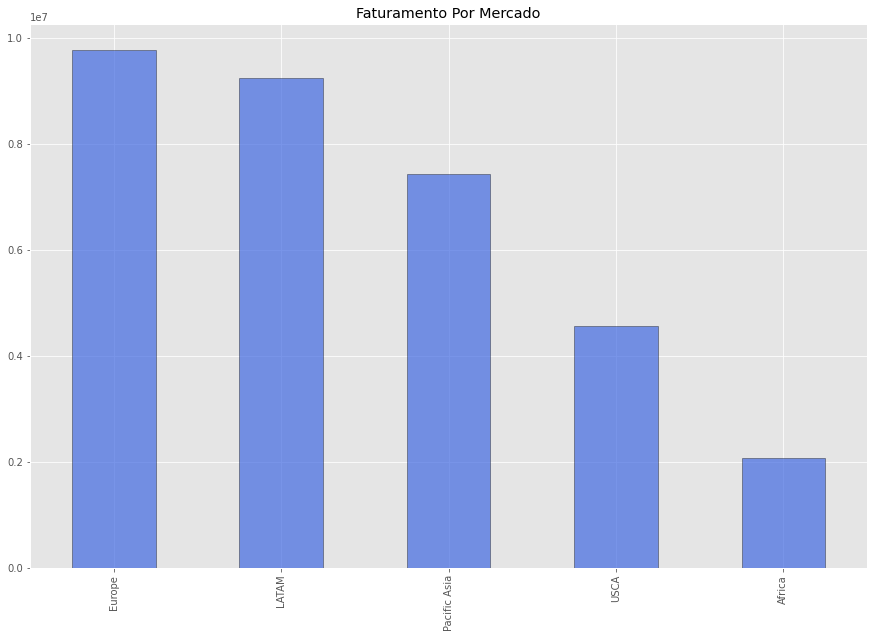

In [53]:
# Faturamento por mercado.

# Preparando os dados.
sales_market = df2.groupby('Market')

# Plotagem.
sales_market['Sales per customer'].sum().sort_values(ascending = False).plot.bar(title = 'Faturamento Por Mercado',
                                                                                 xlabel = '',
                                                                                 ec = 'k', 
                                                                                 alpha = .7, 
                                                                                 color = 'royalblue');

- O mercado Europeu é o que registrou o maior faturamento.

#### 2.3.12 Variáveis:
- **Order City**
- **Order Country** 
- **order date (DateOrders)**
- **Order Id**
- **Order Item Discount**
- **Order Item Discount Rate**
- **Order Item Id**
- **Order Item Profit Ratio**
- **Order Item Quantity**
- **Sales**
- **Order Region**
- **Order State**
- **Order Status**

Essas variáveis representam informações específicas sobre os pedidos dos clientes.

In [54]:
# Visualizando as variáveis.
df2.iloc[:,14:27].head()

,Order City,Order Country,order date (DateOrders),Order Id,Order Item Discount,Order Item Discount Rate,Order Item Id,Order Item Profit Ratio,Order Item Quantity,Sales,Order Region,Order State,Order Status
0,Bekasi,Indonesia,1/31/2018 22:56,77202,13.110000,0.04,180517,0.29,1,327.75,Southeast Asia,Java Occidental,COMPLETE
1,Bikaner,India,1/13/2018 12:27,75939,16.389999,0.05,179254,-0.80,1,327.75,South Asia,RajastÃ¡n,PENDING
2,Bikaner,India,1/13/2018 12:06,75938,18.030001,0.06,179253,-0.80,1,327.75,South Asia,RajastÃ¡n,CLOSED
3,Townsville,Australia,1/13/2018 11:45,75937,22.940001,0.07,179252,0.08,1,327.75,Oceania,Queensland,COMPLETE
4,Townsville,Australia,1/13/2018 11:24,75936,29.500000,0.09,179251,0.45,1,327.75,Oceania,Queensland,PENDING_PAYMENT


In [55]:
# Cidades presentes no conjunto de dados.
len(df2['Order City'].unique())

3597

In [56]:
# Países presentes no conjunto de dados.
len(df2['Order Country'].unique())

164

A empresa despachou pedidos para 3597 cidade em 164 países.

Essas duas variáveis são categóricas e possuem muitas classes, talvez seja interessante considerar apenas a variável **`Market`** que de certa forma representa a mesma informação de maneira agrupada. Por ora, deixaremos assim.

Para a variável **`order date (DataOrders)`**, vamos separar os dados por período, criando novas variáveis.

In [57]:
# Novas variáveis.

# Ano do pedido.
df2['order_year'] = pd.DatetimeIndex(df2['order date (DateOrders)']).year

# Mês do pedido.
df2['order_month'] = pd.DatetimeIndex(df2['order date (DateOrders)']).month

# Dia da semana do pedido.
df2['order_week_day'] = pd.DatetimeIndex(df2['order date (DateOrders)']).weekday

# Hora do pedido.
df2['order_hour'] = pd.DatetimeIndex(df2['order date (DateOrders)']).hour

# Ano e mês do pedido.
df2['order_month_year'] = pd.to_datetime(df2['order date (DateOrders)']).dt.to_period('M')

In [58]:
# Visualizando as variáveis.
df2.iloc[:,33:39].head()

,order_year,order_month,order_week_day,order_hour,order_month_year
0,2018,1,2,22,2018-01
1,2018,1,5,12,2018-01
2,2018,1,5,12,2018-01
3,2018,1,5,11,2018-01
4,2018,1,5,11,2018-01


Com essas novas variáveis podemos obter alguns insights em relação as vendas.

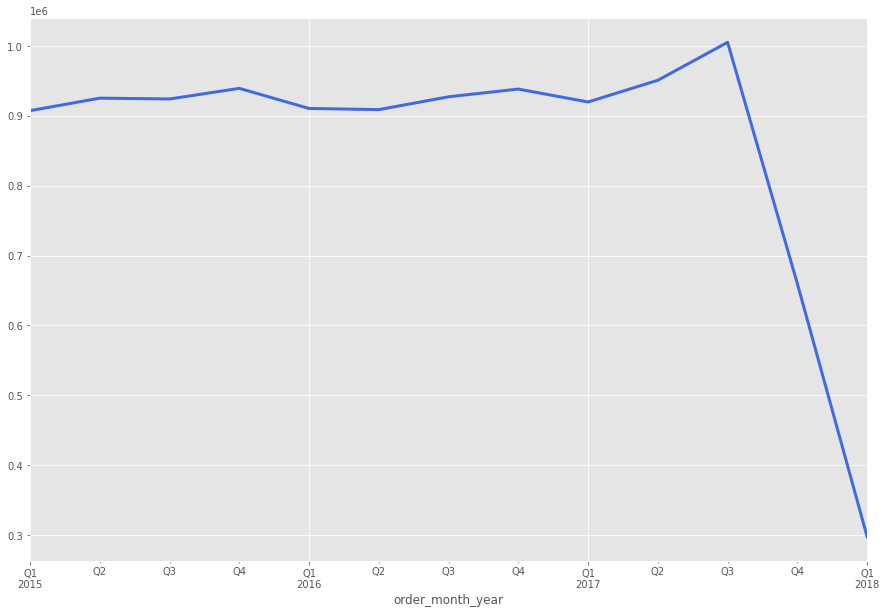

In [59]:
# Média de vendas por trimestre.

# Preparando os dados.
quarter = df2.groupby('order_month_year')

# Plotagem.
quarter['Sales per customer'].sum().resample('Q').mean().plot(color = 'royalblue');

As vendas são consistentes do primeiro trimestre de 2015 até o terceiro trimestre de 2017 e de repente há uma forte queda.

Talvez essa queda seja gerada pela falta de registros nesse período.

In [60]:
# Data do último pedido.
df2[['order_month_year']].max()

order_month_year    2018-01
dtype: object

Em 2018, temos apenas registros do mês de janeiro.

Vamos verificar agora o valor médio de vendas por semestre, por mês, por dias da semana e por horas.

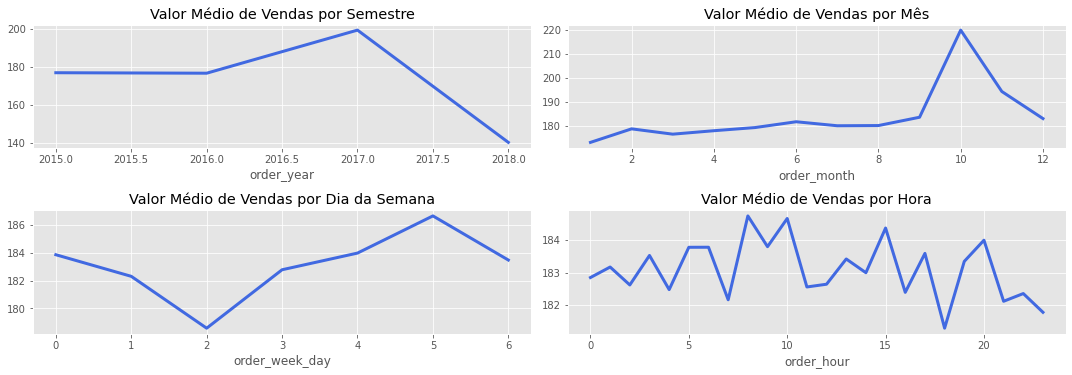

In [61]:
# Valor médio das vendas por período.

# Semestre.
plt.subplot(4, 2, 1)
semester = df2.groupby('order_year')
semester['Sales per customer'].mean().plot(title = 'Valor Médio de Vendas por Semestre', 
                                           color = 'royalblue')

# Mês
plt.subplot(4, 2, 2)
month = df2.groupby('order_month')
month['Sales per customer'].mean().plot(title = 'Valor Médio de Vendas por Mês',
                                        color = 'royalblue')

# Dias da semana.
plt.subplot(4, 2, 3)
day = df2.groupby('order_week_day')
day['Sales per customer'].mean().plot(title = 'Valor Médio de Vendas por Dia da Semana', 
                                      color = 'royalblue')

# Horas.
plt.subplot(4, 2, 4)
hrs = df2.groupby('order_hour')
hrs['Sales per customer'].mean().plot(title = 'Valor Médio de Vendas por Hora', 
                                      color = 'royalblue')

plt.tight_layout()
plt.show()

Baseado na plotagem acima, concluímos:

- O primeiro semestre de 2017 foi o que gerou o maior valor médio de vendas.
- Os melhores meses são outubro e novembro.
- Quarta-feira (2), é o pior dia da semana, e sábado (5) o melhor.
- Em relação ao horário, as vendas são consistentes ao longo do dia.

Vamos seguir com a análise.

In [62]:
# Visualizando as variáveis.
df2.iloc[:,17:24].head()

,Order Id,Order Item Discount,Order Item Discount Rate,Order Item Id,Order Item Profit Ratio,Order Item Quantity,Sales
0,77202,13.110000,0.04,180517,0.29,1,327.75
1,75939,16.389999,0.05,179254,-0.80,1,327.75
2,75938,18.030001,0.06,179253,-0.80,1,327.75
3,75937,22.940001,0.07,179252,0.08,1,327.75
4,75936,29.500000,0.09,179251,0.45,1,327.75


Podemos desconsiderar da análise:

- **`Order Id`**: representa o código da encomenda.
- **`Order Item Id`**: representa o código de identificação do pedido.

In [63]:
# Estatísticas das variáveis.
df2[['Order Item Discount', 
     'Order Item Discount Rate', 
     'Order Item Profit Ratio', 
     'Order Item Quantity', 
     'Sales']].describe()

,Order Item Discount,Order Item Discount Rate,Order Item Profit Ratio,Order Item Quantity,Sales
count,180511.000000,180511.000000,180511.000000,180511.000000,180511.000000
mean,20.664326,0.101669,0.120641,2.127688,203.765709
std,21.801021,0.070416,0.466803,1.453464,132.270795
min,0.000000,0.000000,-2.750000,1.000000,9.990000
25%,5.400000,0.040000,0.080000,1.000000,119.980003
50%,14.000000,0.100000,0.270000,1.000000,199.919998
75%,29.990000,0.160000,0.360000,3.000000,299.950012
max,500.000000,0.250000,0.500000,5.000000,1999.989990


Baseado nas estatísticas acima, concluímos:

- O maior valor de desconto foi de 500 dólares, valor muito acima da média de 20 dólares.
- A média de porcentagem de desconto é de 10%.
- A média na taxa de lucro de um pedido é de 12%.
- Nenhum produto aparece mais de 5 vezes em um único pedido
- O maior valor de um produto sem desconto é 1.999,98 dólares.

Vejamos quais são os produtos que geraram a maior taxa de lucratividade.

In [64]:
# Produtos que registram a maior taxa de lucro.
profit = df2[(df2['Order Item Profit Ratio'] == 0.50)]
profit[['Product Name']].value_counts()

Product Name                                 
Nike Men's CJ Elite 2 TD Football Cleat          332
Perfect Fitness Perfect Rip Deck                 322
Nike Men's Dri-FIT Victory Golf Polo             304
O'Brien Men's Neoprene Life Vest                 276
Field & Stream Sportsman 16 Gun Fire Safe        230
                                                ... 
TaylorMade White Smoke IN-12 Putter                1
Merrell Women's Grassbow Sport Waterproof Hik      1
Total Gym 1400                                     1
Mio ALPHA Heart Rate Monitor/Sport Watch           1
TaylorMade Women's RBZ SL Rescue                   1
Length: 96, dtype: int64

96 produtos registraram taxa de lucratividade de 50% em pelo menos 1 pedido.

O produto *Nike Men's CJ Elite 2 TD Football Cleat* foi o principal item da lista.

Vejamos a variável **`Sales`**, que representa o valor total do pedido sem o desconto.

In [65]:
# Estatísticas da variável.
df2[['Sales']].describe()

,Sales
count,180511.000000
mean,203.765709
std,132.270795
min,9.990000
25%,119.980003
50%,199.919998
75%,299.950012
max,1999.989990


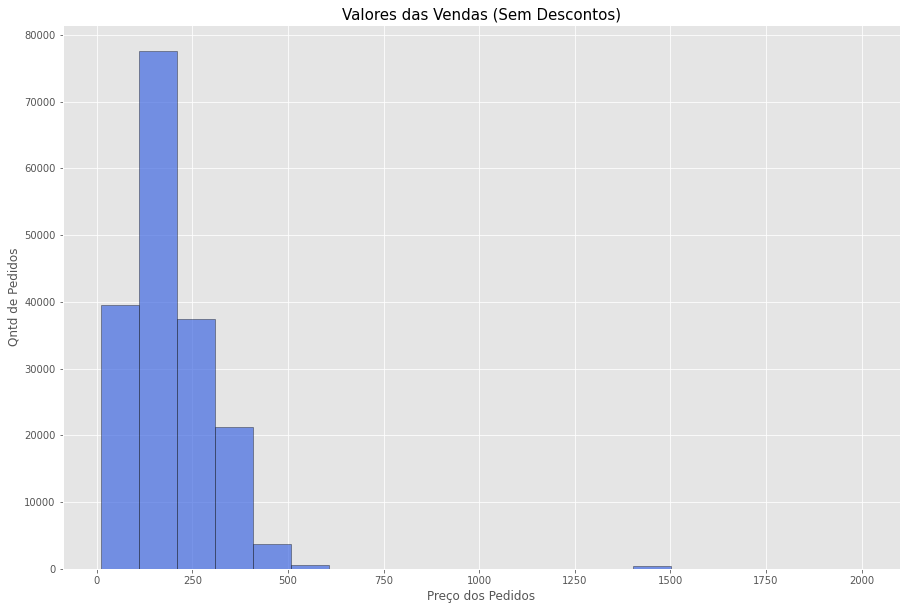

In [66]:
# Histograma da variável.

# Plotagem.
df2['Sales'].hist(bins = 20, 
                  ec = 'k', 
                  alpha = .7, 
                  color = 'royalblue')

# Labels.
plt.title('Valores das Vendas (Sem Descontos)', size = 15)
plt.xlabel('Preço dos Pedidos')
plt.ylabel('Qntd de Pedidos');

- A grande maioria dos pedidos, possuem um valor de até aproximadamente 250 dólares.

Temos ainda mais algumas variáveis com informações referentes aos pedidos.

In [67]:
# Visualizando as variáveis.
df2.iloc[:,24:27].head()

,Order Region,Order State,Order Status
0,Southeast Asia,Java Occidental,COMPLETE
1,South Asia,RajastÃ¡n,PENDING
2,South Asia,RajastÃ¡n,CLOSED
3,Oceania,Queensland,COMPLETE
4,Oceania,Queensland,PENDING_PAYMENT


Vamos verificar os valores únicos de cada variável.

In [68]:
# Registros das variáveis.
df2[['Order Region']].value_counts()

Order Region   
Central America    28341
Western Europe     27108
South America      14935
Oceania            10148
Northern Europe     9791
Southeast Asia      9536
Southern Europe     9430
Caribbean           8318
West of USA         7993
South Asia          7730
Eastern Asia        7279
East of USA         6915
West Asia           6009
US Center           5887
South of  USA       4045
Eastern Europe      3920
West Africa         3696
North Africa        3232
East Africa         1852
Central Africa      1677
Southern Africa     1157
Canada               959
Central Asia         553
dtype: int64

São 23 regiões nessa variável, sendo *Central America* a mais frequente.

In [69]:
# Registros das variáveis.
df2[['Order State']].value_counts()

Order State                
Inglaterra                     6722
California                     4966
Isla de Francia                4580
Renania del Norte-Westfalia    3302
San Salvador                   3055
                               ... 
Serbia Central                    1
Mie                               1
Aomori                            1
Savanes                           1
Tottori                           1
Length: 1089, dtype: int64

São 1089 valores únicos que representam os estados para onde os pedidos foram despachados.

Assim como as variáveis **`Order City`** e **`Order Country`**, a **`Order Region`** e a **`Order State`** também poderiam ser substituídas pela variável **`Market`**.

In [70]:
# Registros das variáveis.
df2[['Order Status']].value_counts()

Order Status   
COMPLETE           59489
PENDING_PAYMENT    39830
PROCESSING         21902
PENDING            20224
CLOSED             19616
ON_HOLD             9803
SUSPECTED_FRAUD     4062
CANCELED            3692
PAYMENT_REVIEW      1893
dtype: int64

4062 pedidos tiveram suspeitas de fraudes.

Descobrir quais métodos de pagamentos são utilizados nas tentativas de fraudes pode ajudar a empresa a combater esse fenômeno.

In [71]:
# Métodos de pagamentos com suspeitas de fraudes.
frauds = df2[(df2['Order Status'] == 'SUSPECTED_FRAUD')]
frauds[['Type']].value_counts()

Type    
TRANSFER    4062
dtype: int64

Todas os pedidos que tiveram suspeitas de fraudes foram pagos via transferência bancária.

Veremos quais são as regiões desses pedidos.

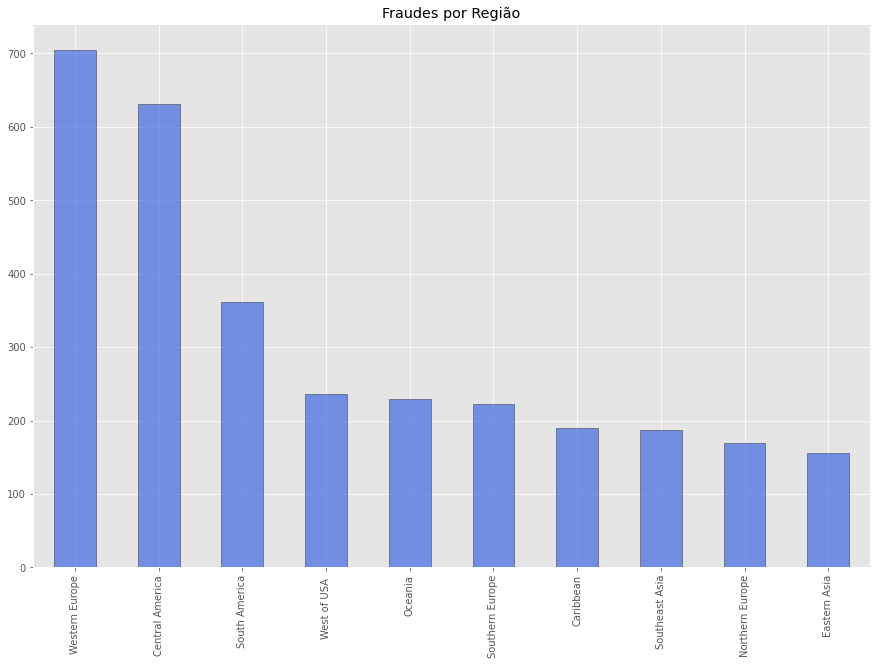

In [72]:
# Fraudes por região.
frauds['Order Region'].value_counts().nlargest(10).plot.bar(title = 'Fraudes por Região',
                                                            ec = 'k', 
                                                            alpha = .7,
                                                            color = 'royalblue');

- A Europa Ocidental e a América Central, são as líderes em número de pedidos suspeitos de fraudes.

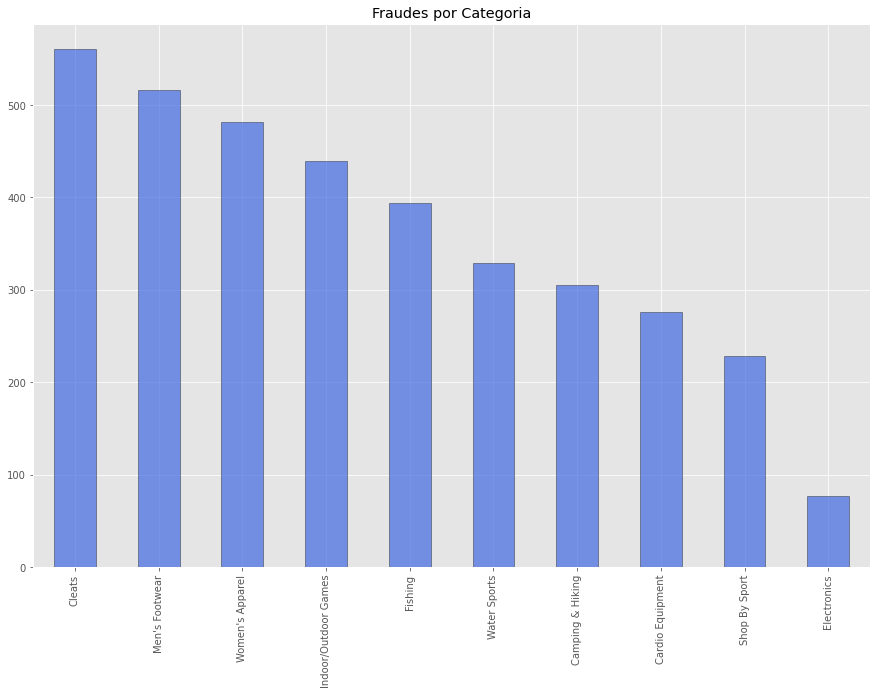

In [73]:
# Fraudes por categoria.
frauds['Category Name'].value_counts().nlargest(10).plot.bar(title = 'Fraudes por Categoria',
                                                             ec = 'k', 
                                                             alpha = .7, 
                                                             color = 'royalblue');

- Chuteiras e calçados masculinos são os lideres nos pedidos com suspeitas de fraudes.

#### 2.3.13 Variáveis:

- **Product Card Id**
- **Product Name**
- **Product Price** 
- **Product Status**
- **Shipping Mode**  
- **Customer Name**

Essas são variáveis que contém informações sobre os produtos despachados.

In [74]:
# Visualizando as variáveis.
df2.iloc[:,27:33].head()

,Product Card Id,Product Name,Product Price,Product Status,Shipping Mode,Customer Name
0,1360,Smart watch,327.75,0,Standard Class,CallyHolloway
1,1360,Smart watch,327.75,0,Standard Class,IreneLuna
2,1360,Smart watch,327.75,0,Standard Class,GillianMaldonado
3,1360,Smart watch,327.75,0,Standard Class,TanaTate
4,1360,Smart watch,327.75,0,Standard Class,OrliHendricks


Vamos associar a **`Product Card Id`** com a **`Product Name`**.

In [75]:
# Associando as variáveis.
product = df2.copy()
product = product[['Product Card Id', 'Product Name']]
product = product.drop_duplicates(['Product Card Id', 'Product Name'])
product = product.groupby('Product Card Id')['Product Name'].apply(list).reset_index(name = 'Product')

In [76]:
# Visualizando os registros.
product

,Product Card Id,Product
0,19,[Nike Men's Fingertrap Max Training Shoe]
1,24,[Elevation Training Mask 2.0]
2,35,[adidas Brazuca 2014 Official Match Ball]
3,37,[adidas Kids' F5 Messi FG Soccer Cleat]
4,44,[adidas Men's F10 Messi TRX FG Soccer Cleat]
...,...,...
113,1359,[Adult dog supplies]
114,1360,[Smart watch ]
115,1361,[Toys ]
116,1362,[Fighting video games]


Temos 118 tipos de produtos disponíveis.

In [77]:
# Estatística das variáveis.
df2[['Product Price', 
     'Product Status']].describe()

,Product Price,Product Status
count,180511.000000,180511.0
mean,141.223391,0.0
std,139.727174,0.0
min,9.990000,0.0
25%,50.000000,0.0
50%,59.990002,0.0
75%,199.990005,0.0
max,1999.989990,0.0


**`Product Status`** possui todos os registros com o valor 0, indicando que todos os itens estão disponíveis para estoque, porém, essa informação não será relevante para a análise, e essa variável será excluída.

Análisaremos a **`Shipping Mode`**.

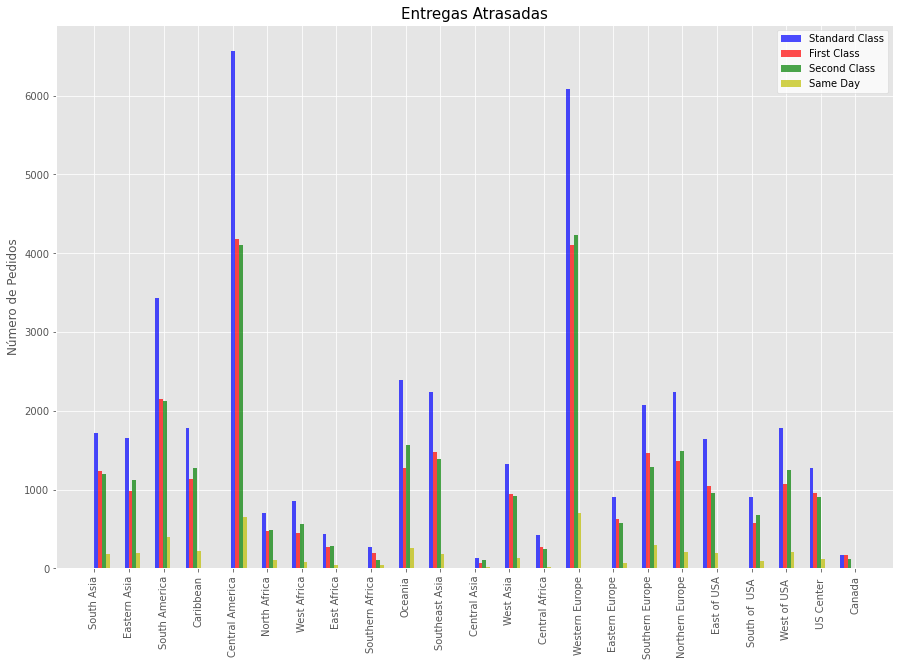

In [78]:
# Entregas atrasadas por método de envio e região.

# Preparando os dados.
sm1 = df2[(df2['Delivery Status'] == 'Late delivery') & (df2['Shipping Mode'] == 'Standard Class')]['Order Region']
sm2 = df2[(df2['Delivery Status'] == 'Late delivery') & (df2['Shipping Mode'] == 'First Class')]['Order Region']
sm3 = df2[(df2['Delivery Status'] == 'Late delivery') & (df2['Shipping Mode'] == 'Second Class')]['Order Region']
sm4 = df2[(df2['Delivery Status'] == 'Late delivery') & (df2['Shipping Mode'] == 'Same Day')]['Order Region']

# Plotagem.
plt.hist([sm1, sm2, sm3, sm4], 
         bins = 50, 
         density = False, 
         alpha = 0.7, 
         rwidth = 1.0, 
         color = ['b', 'r', 'g', 'y'])

# Labels.
plt.title('Entregas Atrasadas', size = 15)
plt.ylabel('Número de Pedidos')
plt.xticks(rotation = 90)
plt.legend(['Standard Class', 
            'First Class', 
            'Second Class', 
            'Same Day'], loc = 'upper right', facecolor = 'white');

Baseado na plotagem acima, concluímos:

- O maior número de entregas atrasadas ocorreu na classe **`Standard Class`**.
- A classe *Same Day* possui o menor número de entregas atrasadas em todas as regiões.
- *Fisrt Class* e *Second Class* possuem praticamente a mesma quantidade de entregas atrasadas.

A variável **`Customer Name`** será desconsiderada e representada pela **`Customer Id`**.

#### 2.3.14 Variáveis:

- **order_year**
- **order_month**
- **order_week_day**
- **order_hour**
- **order_month_year**

Essas são as variáveis que "desmembramos" da variável **`order date (DateOrders)`**.

De todas essas, utilizaremos apenas as variáveis **`order_year`** e **`order_month`**. 

Por fim, vamos excluir as variáveis que julgamos irrelevantes durante a análise exploratória, são elas: 

- **`Order City`**, **`Order Country`**, **`Order Region`**, **`Order State`**: utilizaremos apenas a variável **`Market`**.
- **`Product Status`**: todos os registros são 0.
- **`Customer Name`**: utilizaremos a variável **`Customer Id`** para representar os clientes.
- **`order_week_day`**, **`order_hour`**, **`order date (DateOrders)`**: utilizaremos apenas as variáveis **`order_year`** e **`order_month`**.

In [79]:
# Excluíndo as variáveis.
df2.drop(['Order City', 
          'Order Country', 
          'Order Region', 
          'Order State', 
          'Product Status', 
          'Customer Name', 
          'order_week_day', 
          'order_hour', 
          'order date (DateOrders)'], axis = 1, inplace = True)

### 2.4 Análise de Correlação

Durante a análise exploratória, desconsideramos algumas variáveis que possuiam informações irrelevantes para nosso problema de negócio. 

Agora, vamos realizar alguns testes para verificarmos as relações entre as variáveis.

Antes, vamos criar uma cópia do dataframe que trabalhamos até aqui.

In [80]:
# Cópia do dataframe.
df3 = df2.copy()

In [81]:
# Visualizando o dataframe.
df3.head()

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer Id,Customer Segment,Department Id,Department Name,Market,Order Id,Order Item Discount,Order Item Discount Rate,Order Item Id,Order Item Profit Ratio,Order Item Quantity,Sales,Order Status,Product Card Id,Product Name,Product Price,Shipping Mode,order_year,order_month,order_month_year
0,DEBIT,3,4,91.250000,314.640015,Advance shipping,0,73,Sporting Goods,20755,Consumer,2,Fitness,Pacific Asia,77202,13.110000,0.04,180517,0.29,1,327.75,COMPLETE,1360,Smart watch,327.75,Standard Class,2018,1,2018-01
1,TRANSFER,5,4,-249.089996,311.359985,Late delivery,1,73,Sporting Goods,19492,Consumer,2,Fitness,Pacific Asia,75939,16.389999,0.05,179254,-0.80,1,327.75,PENDING,1360,Smart watch,327.75,Standard Class,2018,1,2018-01
2,CASH,4,4,-247.779999,309.720001,Shipping on time,0,73,Sporting Goods,19491,Consumer,2,Fitness,Pacific Asia,75938,18.030001,0.06,179253,-0.80,1,327.75,CLOSED,1360,Smart watch,327.75,Standard Class,2018,1,2018-01
3,DEBIT,3,4,22.860001,304.809998,Advance shipping,0,73,Sporting Goods,19490,Home Office,2,Fitness,Pacific Asia,75937,22.940001,0.07,179252,0.08,1,327.75,COMPLETE,1360,Smart watch,327.75,Standard Class,2018,1,2018-01
4,PAYMENT,2,4,134.210007,298.250000,Advance shipping,0,73,Sporting Goods,19489,Corporate,2,Fitness,Pacific Asia,75936,29.500000,0.09,179251,0.45,1,327.75,PENDING_PAYMENT,1360,Smart watch,327.75,Standard Class,2018,1,2018-01


Para calcular a correlação das variáveis, iremos utilizar a matriz de correlação de *Pearson*.

Esse é um dos métodos mais usados para a seleção de variáveis, dada a sua facilidade de medição e entendimento.

Basicamente, estamos medindo o quanto uma variável influência em outra. Quando "A" aumenta ou diminui, mede-se o quanto "B" irá aumentar ou diminuir proporcionalmente em relação a "A".

Após o cálculo, teremos números que vão de -1 (correlação perfeitamente negativa) a 0 (sem correlação) até 1 (correlação perfeitamente positiva).

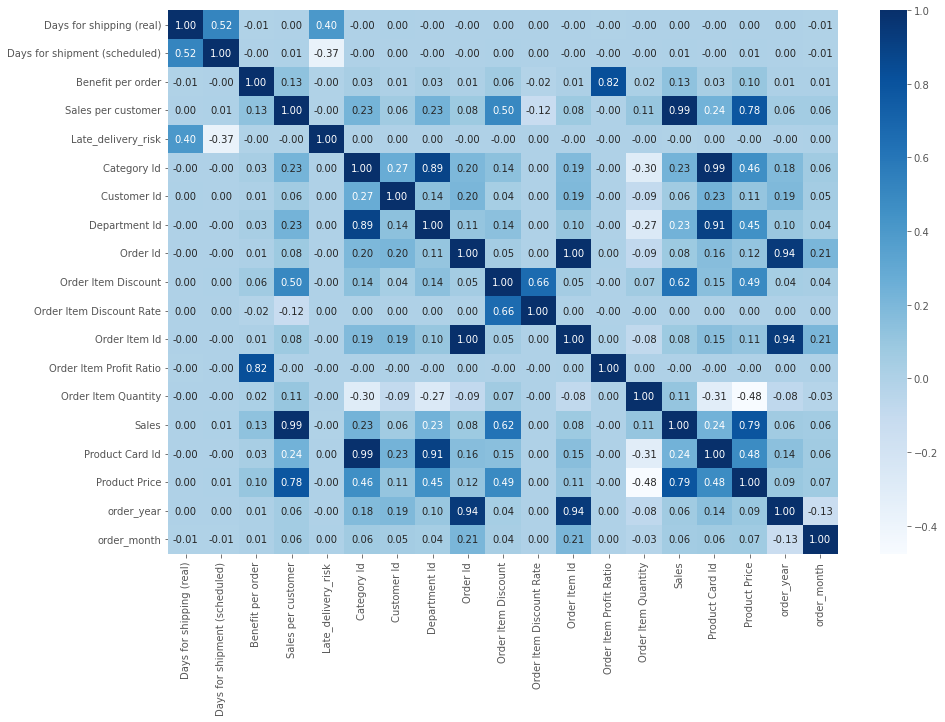

In [82]:
# Matriz de correlação.
corr_df = df3.corr()

# Plotagem.
sns.heatmap(corr_df, 
            cmap = 'Blues', 
            annot = True, 
            fmt = '.2f');

Agora vamos tomar algumas decisões em relação ao conjunto de dados.

Algumas variáveis estão altamente correlacionadas, com valores 0.99 e 1, isso pode indicar um problema de multicolinearidade, sendo assim, removeremos as seguintes variáveis: 

- **`Department Id`** que está altamente correlacionada com **`Category Id`**.
- **`Order Id`** e **`Order Item Id`** serão descartadas pois representam a identificação do pedido.
- **`Order Item Profit Ratio`** que está altamente correlacionada com **`Benefit per order`**.
- **`Sales`**, que está altamente correlacionada com **`Sales per customer`**.
- **`Product Card Id`** que está altamente correlacionada com **`Category Id`**.

In [83]:
# Excluíndo as variáveis.
df3.drop(['Department Id', 
          'Order Id', 
          'Order Item Id', 
          'Order Item Profit Ratio', 
          'Sales', 
          'Product Card Id'], axis = 1, inplace = True)

Vejamos como ficou as correlações após essas exclusões.

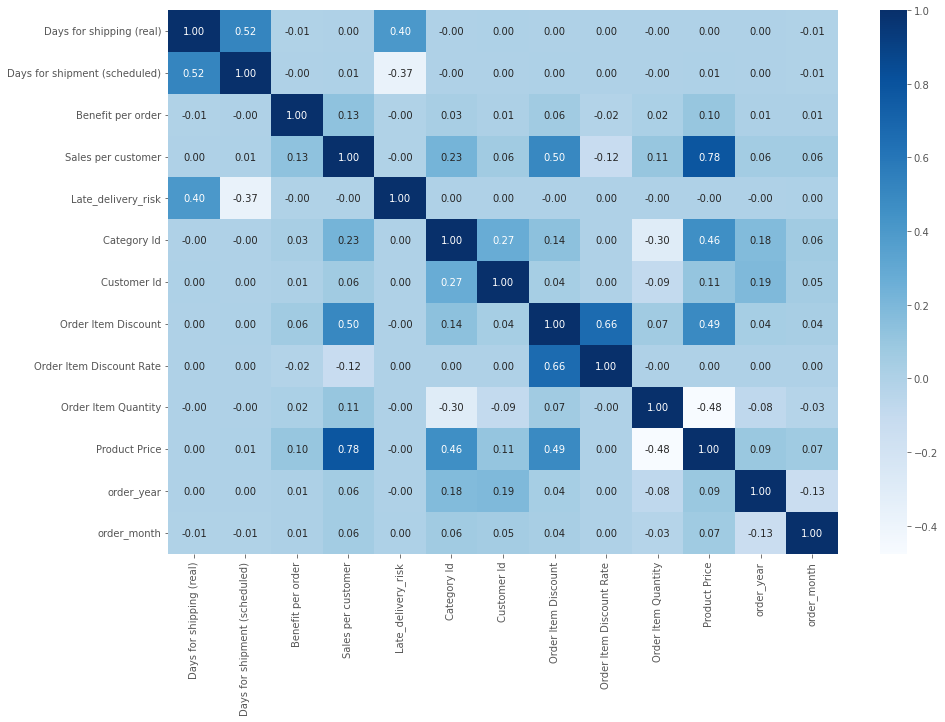

In [84]:
# Matriz de correlação.
corr_df2 = df3.corr()

# Plotagem.
sns.heatmap(corr_df2, 
            cmap = 'Blues', 
            annot = True, 
            fmt = '.2f');

Parece bem melhor.

Ainda temos mais algumas variáveis a verificar.

In [85]:
# Visualizando o dataframe.
df3.head()

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer Id,Customer Segment,Department Name,Market,Order Item Discount,Order Item Discount Rate,Order Item Quantity,Order Status,Product Name,Product Price,Shipping Mode,order_year,order_month,order_month_year
0,DEBIT,3,4,91.250000,314.640015,Advance shipping,0,73,Sporting Goods,20755,Consumer,Fitness,Pacific Asia,13.110000,0.04,1,COMPLETE,Smart watch,327.75,Standard Class,2018,1,2018-01
1,TRANSFER,5,4,-249.089996,311.359985,Late delivery,1,73,Sporting Goods,19492,Consumer,Fitness,Pacific Asia,16.389999,0.05,1,PENDING,Smart watch,327.75,Standard Class,2018,1,2018-01
2,CASH,4,4,-247.779999,309.720001,Shipping on time,0,73,Sporting Goods,19491,Consumer,Fitness,Pacific Asia,18.030001,0.06,1,CLOSED,Smart watch,327.75,Standard Class,2018,1,2018-01
3,DEBIT,3,4,22.860001,304.809998,Advance shipping,0,73,Sporting Goods,19490,Home Office,Fitness,Pacific Asia,22.940001,0.07,1,COMPLETE,Smart watch,327.75,Standard Class,2018,1,2018-01
4,PAYMENT,2,4,134.210007,298.250000,Advance shipping,0,73,Sporting Goods,19489,Corporate,Fitness,Pacific Asia,29.500000,0.09,1,PENDING_PAYMENT,Smart watch,327.75,Standard Class,2018,1,2018-01


Por exemplo, **`Delivery Status`** indica o status da entrega do pedido, e vimos que todos os pedidos entregues de forma atrasada, estão representados com 1 na variável **`Late_delivery_risk`**. Portanto, as duas variáveis representam basicamente a mesma informação. Sendo assim iremos desconsiderar a **`Delivery Status`**.

A variável **`Category Id`**, na verdade é uma variável categórica, que representa a categoria do produto, sendo assim, ela será mantida, e descartaremos a **`Category Name`**.

**`Customer Id`** também será descartada pois representa o código da identificação do cliente.

**`Department Name`** também será descartada pois representa a mesma informação da variável **`Department Id`** que já foi excluída.

Para as variáveis de desconto do item do pedido, manteremos apenas a **`Order Item Discount`**.

A **`Product Name`** também será descartada pois representa a mesma informação da variável **`Product Card Id`** que já foi excluída.

Por fim, também deixaremos de fora do treinamento a **`order_month_year`**.

In [86]:
# Excluíndo as variáveis.
df3.drop(['Delivery Status', 
          'Category Name', 
          'Customer Id', 
          'Department Name', 
          'Order Item Discount Rate', 
          'Product Name', 
          'order_month_year'], axis = 1, inplace = True)

In [87]:
# Informações do dataframe.
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 180511 entries, 0 to 180518
Data columns (total 16 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Type                           180511 non-null  object 
 1   Days for shipping (real)       180511 non-null  int64  
 2   Days for shipment (scheduled)  180511 non-null  int64  
 3   Benefit per order              180511 non-null  float64
 4   Sales per customer             180511 non-null  float64
 5   Late_delivery_risk             180511 non-null  int64  
 6   Category Id                    180511 non-null  int64  
 7   Customer Segment               180511 non-null  object 
 8   Market                         180511 non-null  object 
 9   Order Item Discount            180511 non-null  float64
 10  Order Item Quantity            180511 non-null  int64  
 11  Order Status                   180511 non-null  object 
 12  Product Price                 

Por ora, seguiremos com esse conjunto de dados, caso necessário, podemos incluir ou remover mais variáveis.

Para um segundo ciclo do projeto, também poderíamos utilizar alguma técnica para realizar a seleção das melhores variáveis de maneira automática e assim, treinar e avaliar o desempenho de um modelo com esse novo conjunto de dados.

Antes de partimos para a preparação dos dados, vamos listar todas as variáveis que foram excluídas.


**Variáveis Excluídas**

- Customer Fname
- Customer Lname 
- Order Zipcode 
- Product Description
- Customer Email 
- Customer Password 
- Latitude 
- Longitude 
- Product Image 
- shipping date (DateOrders)
- Order Profit Per Order 
- Order Item Total
- Order Customer Id
- Order Item Cardprod Id
- Order Item Product Price 
- Product Category Id
- Order City 
- Order Country
- Order Region
- Order State
- Product Status
- Customer Name
- order_week_day
- order_hour
- order date (DateOrders)
- Department Id
- Order Id
- Order Item Id
- Order Item Profit Ratio
- Sales
- Product Card Id
- Delivery Status
- Category Name
- Customer Id
- Department Name
- Order Item Discount Rate
- Product Name
- order_month_year

## 3. Pré-Processamento dos Dados

Nessa etapa, iremos preparar os dados para a etapa da modelagem preditiva.

Em meu blog, há um artigo onde explico com mais detalhes algumas das principais técnicas utilizadas nessa etapa, basta acessar <a href='https://medium.com/@rafaelfelippe_/pr%C3%A9-processamento-de-dados-com-python-d2c607d134f'>este link</a>.

### 3.1 Divisão Treino/Teste

Vamos dividir nossos dados em dois grupos, um para treinar o modelo e outro para testá-lo.

Atribuiremos uma divisão 70/30.

In [88]:
# Separando os dados.
X = df3.loc[:, df3.columns != 'Late_delivery_risk']
y = df3['Late_delivery_risk']

In [89]:
# Divisão treino/teste.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [90]:
# Dimensão dos conjuntos.
print('Exemplos de Treino: {}'.format(len(X_train)))
print('Exemplos de Teste: {}'.format(len(X_test)))

Exemplos de Treino: 126357
Exemplos de Teste: 54154


### 3.2 Codificação de Variáveis

Como vimos, temos variáveis do tipo categórica e do tipo numérica.

Porém, algumas dessas variáveis possuem seus dados em formato *object*, ou seja, em formato de texto.

Os algoritmos de Machine Learning exigem que os dados de entrada estejam em formato numérico, sendo assim, iremos converter as variáveis que possuem registros em formato de texto, para número que representarão a mesma informação.

In [91]:
# Visualizando o dataframe.
df3.head()

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Late_delivery_risk,Category Id,Customer Segment,Market,Order Item Discount,Order Item Quantity,Order Status,Product Price,Shipping Mode,order_year,order_month
0,DEBIT,3,4,91.250000,314.640015,0,73,Consumer,Pacific Asia,13.110000,1,COMPLETE,327.75,Standard Class,2018,1
1,TRANSFER,5,4,-249.089996,311.359985,1,73,Consumer,Pacific Asia,16.389999,1,PENDING,327.75,Standard Class,2018,1
2,CASH,4,4,-247.779999,309.720001,0,73,Consumer,Pacific Asia,18.030001,1,CLOSED,327.75,Standard Class,2018,1
3,DEBIT,3,4,22.860001,304.809998,0,73,Home Office,Pacific Asia,22.940001,1,COMPLETE,327.75,Standard Class,2018,1
4,PAYMENT,2,4,134.210007,298.250000,0,73,Corporate,Pacific Asia,29.500000,1,PENDING_PAYMENT,327.75,Standard Class,2018,1


In [92]:
# Instanciando o objeto.
le = LabelEncoder()

In [93]:
# Variáveis de texto.
object_cols = ['Type', 
               'Customer Segment', 
               'Market', 
               'Order Status', 
               'Shipping Mode']

In [94]:
# Aplicando a transformação.
for col in object_cols:
    X_train[col] = le.fit_transform(X_train[col])
    X_test[col] = le.transform(X_test[col])

In [95]:
# Visualizando o dataframe.
X_train.head()

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Category Id,Customer Segment,Market,Order Item Discount,Order Item Quantity,Order Status,Product Price,Shipping Mode,order_year,order_month
98760,1,2,4,-199.490005,284.980011,43,2,1,15.000000,1,2,299.980011,3,2015,10
93060,1,5,4,98.599998,339.980011,45,0,2,60.000000,1,2,399.980011,3,2015,3
1250,3,2,1,92.500000,321.200012,73,1,3,6.560000,1,7,327.750000,0,2017,12
162900,1,3,4,-259.989990,399.980011,45,2,2,0.000000,1,2,399.980011,3,2015,3
31442,3,6,4,-29.820000,419.959992,9,2,4,79.989998,5,8,99.989998,3,2016,7


Agora iremos converter o formato das variáveis.

In [96]:
# Variáveis categóricas.
cat_cols = ['Type', 
            'Category Id', 
            'Customer Segment', 
            'Market', 
            'Order Status', 
            'Shipping Mode', 
            'order_year', 
            'order_month']

In [97]:
# Aplicando a transformação.
for col in cat_cols:
    X_train[col] = X_train[col].astype('category')
    X_test[col] = X_test[col].astype('category')

In [98]:
# Informações do dataframe.
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 126357 entries, 98760 to 121964
Data columns (total 15 columns):
 #   Column                         Non-Null Count   Dtype   
---  ------                         --------------   -----   
 0   Type                           126357 non-null  category
 1   Days for shipping (real)       126357 non-null  int64   
 2   Days for shipment (scheduled)  126357 non-null  int64   
 3   Benefit per order              126357 non-null  float64 
 4   Sales per customer             126357 non-null  float64 
 5   Category Id                    126357 non-null  category
 6   Customer Segment               126357 non-null  category
 7   Market                         126357 non-null  category
 8   Order Item Discount            126357 non-null  float64 
 9   Order Item Quantity            126357 non-null  int64   
 10  Order Status                   126357 non-null  category
 11  Product Price                  126357 non-null  float64 
 12  Shipping Mod

Com isso, todas as variáveis são representadas por números.

### 3.3 Padronização dos Dados

A padronização é o processo de redimensionamento das variáveis, para que elas tenham as propriedades de uma distribuição normal, ou seja, com a média igual a 0 e desvio padrão igual a 1.

Uma forma de padronizar os dados é através do método *StandardScaler*, que utilizaremos a seguir.

In [99]:
# Instanciando o objeto.
scaler = StandardScaler()

In [100]:
# Padronizando as variáveis.
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Devemos padronizar os conjuntos de forma individual para que não haja "vazamento" de informações.

## 4. Modelagem Preditiva

### 4.1 Average Model

O termo *Average Model* se refere a um "modelo médio", ou seja, um modelo extremamente simples, que classificará todos os registros do dataset em apenas uma classe. 

Isso serve como base para podermos comparar a performance de um modelo com um algoritmo mais sofisticado, ou seja, é esperado que o modelo final performe melhor que um modelo que simplesmente classifica todos os registros em apenas uma classe.

Como já vimos que a variável target está balanceada, provavelmente a acurácia do modelo médio ficará em torno de 50%. 

Vamos checar!

In [101]:
# Criando a função do modelo médio.
class AverageModel(BaseEstimator):
    def fit(self, X, y = None):
        pass
    def predict(self, X):
        return np.zeros((len(X), 1), dtype = bool)

In [102]:
# Instanciando o modelo.
avg_model = AverageModel()

In [103]:
# Validação cruzada do modelo.
cross_val_score(avg_model, X_train, y_train, cv = 5, scoring = 'accuracy')

array([0.45429725, 0.45402026, 0.44964584, 0.44632187, 0.45581892])

Acima temos a performance do modelo médio para os 5 folds da validação cruzada. 

É óbvio imaginar que para nosso modelo final, teremos que obter números bem superiores a esses. 

### 4.2 Regressão Logística

Vamos começar a construção do próximo modelo!

Iremos utilizar o algoritmo de Regressão Logística, que apesar do nome, tem como objetivo classificar os dados em duas classes distintas, que em nosso caso, é se uma encomenda tem ou não risco de atraso.

Se desejar mais informações sobre o funcionamento desse algoritmo acesse <a href='https://medium.com/@rafaelfelippe_/regress%C3%A3o-log%C3%ADstica-logistic-regression-7f3f19319bd3'>este link</a> em meu blog de estudos.

Começaremos definindo uma função, que irá treinar o modelo com dados de treino, e em seguida irá realizar a validação cruzada. 

Aqui, já poderíamos utilizar o conjunto de teste, porém, deixaremos esse conjunto de lado para utilizá-lo apenas quando tivermos um modelo pronto.

Sendo assim, podemos utilizar a função *cross_val_predict* que realiza a validação cruzada *K-fold*, e nos retorna as previsões feitas em cada parte.

Isso significa que teremos uma previsão "limpa" para cada instância no conjunto de treino, ou seja, a previsão é feita por um modelo que nunca viu os dados durante o treinamento.

In [104]:
# Criando a função.
def classifiermodel(model, X_train, y_train):
    
    # Treinamento do modelo.
    model = model.fit(X_train, y_train) 
    
    # Previsões obtidas na validação cruzada.
    y_train_pred = cross_val_predict(model, X_train, y_train, cv = 5)
    
    # Métricas de desempenho.
    accuracy = accuracy_score(y_train, y_train_pred)
    precision = precision_score(y_train, y_train_pred)
    recall = recall_score(y_train, y_train_pred) 
    f1 = f1_score(y_train, y_train_pred)
    conf = confusion_matrix(y_train, y_train_pred, labels = [1, 0])
    
    print('Modelo:', model)
    print('Acurácia do modelo:', (accuracy) * 100, '%')
    print('Precision do Modelo:', (precision) * 100, '%')
    print('Recall do modelo:', (recall) * 100, '%')
    print('F1 score:', (f1) * 100, '%')
    print('Matriz de Confusão:\n',  (conf))

Com a função definida, podemos instanciar a classe do algoritmo que iremos utilizar.

Isso também poderia estar alocado dentro da função, caso desejado. 

In [105]:
# Instanciando o modelo.
lr = LogisticRegression(random_state = 42)

Agora podemos aplicar a função aos dados.

In [106]:
# Aplicando a função.
classifiermodel(lr, X_train, y_train)

Modelo: LogisticRegression(random_state=42)
Acurácia do modelo: 98.25652714135347 %
Precision do Modelo: 96.92172014110533 %
Recall do modelo: 99.99422307592323 %
F1 score: 98.43400129374382 %
Matriz de Confusão:
 [[69237     4]
 [ 2199 54917]]


Acima temos as métricas do modelo: 

- **Acurácia**:  indica uma performance geral do modelo, dentre todas as classificações, quantas o modelo classificou corretamente.
    - 124.154 (69.237 + 54.917) / 126.357 (total) = 98,2%.


- **Precision**: dentre todas as previsões realizadas para uma classe, quantas o modelo acertou.
    - 69.237 / 71.436 (69.237 + 2.199) = 96,9% 


- **Recall**: dentre todos os registros reais de uma classe, quantos foram classificados corretamente
    - 69.237 / 69.241 (69.237 + 4) = 99,9%  


- **F1-score**: média harmônica entre precision e recall.


Também podemos analisar a matriz de confusão:

- 69.237 registros da classe positiva foram classificados corretamente.
- 4 registros da classe positiva foram classificados erroneamente para a classe negativa.
- 2.199 registros da classe negativa foram classificados erroneamente para a classe positiva.
- 54.917 registros da classe negativa foram classificados corretamente.


Conseguimos um desempenho bastante satisfatório com um simples modelo de regressão logística. 

Agora, vamos apresentar os dados de teste para esse modelo!

In [107]:
# Previsões com dados de teste.
y_pred = lr.predict(X_test)

Para obter as métricas da performance com os dados de teste, podemos utilizar a função *classification_report*.

In [108]:
# Avaliação do modelo.
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.96      0.98     24422
           1       0.97      1.00      0.98     29732

    accuracy                           0.98     54154
   macro avg       0.99      0.98      0.98     54154
weighted avg       0.98      0.98      0.98     54154



Conseguimos uma boa performance com os dados de teste!

Vejamos a matriz de confusão.

In [109]:
# Matriz de confusão
conf_test = confusion_matrix(y_test, y_pred, labels = [1, 0])
print('Matriz de Confusão:\n',  (conf_test))

Matriz de Confusão:
 [[29731     1]
 [  905 23517]]


Interpretação:

- 29.731 registros da classe positiva foram classificadas corretamente.
- 1 registro da classe positiva foi classificado erroneamente para a classe negativa.
- 905 registros da classe negativa foram classificados erroneamente para a classe positiva.
- 23.517 registros da classe negativa foram classificadas corretamente.

Já temos um modelo capaz de prever o risco de atraso na entrega dos pedidos.

Com isso, finalizamos o primeiro objetivo desse projeto.

Agora, vamos para a segmentação de clientes.

## 5. Segmentação de Clientes

Vamos dar inicio a resolução do segundo objetivo desse projeto: a segmentação dos clientes da empresa.

Embora exista diversos meios para atingir esse objetivo, aqui, vamos utilizar a análise RFM.

A análise RFM é uma estratégia para estimar o valor de um cliente, com base em três váriaveis: 

- **Recency (recência)**: quanto mais recente tiver sido a última compra de um cliente, mais pontos ele recebe aqui.
- **Frequency (frequência)**: quanto maior for o número de compras de um cliente, maior também será sua pontuação neste quesito.
- **Monetary (monetário)**: quanto maior for o gasto do cliente em compras, maior a pontuação.

Para aplicação dessa análise utilizaremos o dataset *df1*, pois vamos precisar de algumas variáveis que desconsideramos durante a análise exploratória.

Vamos iniciar criando uma nova variável, que receberá a data do dia seguinte do último pedido registrado no conjunto de dados.

In [110]:
# Data posterior do último pedido.
last_order_data = dt.datetime(2018, 2, 1)

Também iremos converter o tipo da variável das datas.

In [111]:
# Convertendo a variável.
df1['order date (DateOrders)'] = pd.to_datetime(df1['order date (DateOrders)'])

O código abaixo basicamente já nos dará as 3 variáveis da análise RFM. 

Iremos agrupar os dados utilizando a variável **`Customer Id`** que representa a identificação única de cada cliente. 

Para calcular a recência, ou seja, a data da última compra de cada cliente, iremos utilizar a variável que criamos **`last_order_data`**, e subtrair a data do último pedido gerado pelo cliente, assim, teremos a quantidade de dias desde o último pedido do cliente.

Além disso, observe que estamos pegando o número total de encomendas e o faturamento total para cada cliente, isso representa a frequência e o valor monetário respectivamente.

In [112]:
# Análise RFM.
df_seg = df1.groupby('Customer Id').agg({'order date (DateOrders)': lambda x: (last_order_data - x.max()).days, 
                                         'Order Id': lambda x: len(x), 'Sales per customer': lambda x: x.sum()})

Agora, basta converter a coluna das datas para números inteiros.

In [113]:
# Convertendo a variável.
df_seg['order date (DateOrders)'] = df_seg['order date (DateOrders)'].astype(int)

In [114]:
# Renomeando as colunas do dataframe.
df_seg.rename(columns = {'order date (DateOrders)': 'R', 
                         'Order Id': 'F', 
                         'Sales per customer': 'M'}, inplace = True)

In [115]:
# Visualizando o dataframe.
df_seg.head()

,R,F,M
Customer Id,,,
1,792,1,472.450012
2,136,10,1618.660042
3,229,18,3189.200037
4,380,14,1480.709993
5,457,7,1101.919998


-**R (Recência)**: indica quantos dias se passaram desde o último pedido do cliente.

-**F (Frequência)**: indica a quantidade de pedidos feitos pelo cliente.

-**M (Monetário)**: indica o valor gasto pelo cliente.

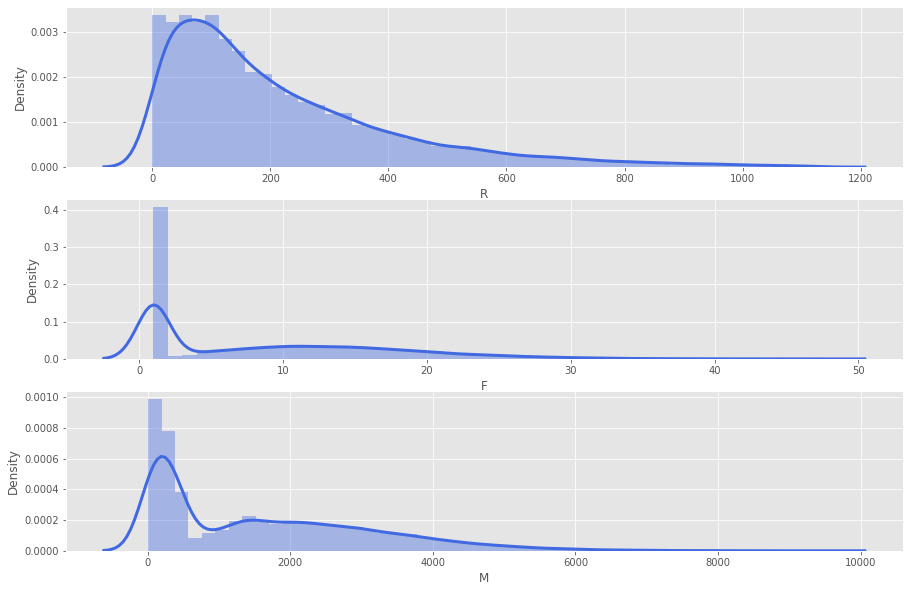

In [116]:
# Densidade das variáveis RFM.

plt.subplot(3, 1, 1)
sns.distplot(df_seg['R'], color = 'royalblue')

plt.subplot(3, 1, 2) 
sns.distplot(df_seg['F'], color = 'royalblue')

plt.subplot(3, 1, 3)
sns.distplot(df_seg['M'], color = 'royalblue');

Baseado nas plotagens acima, vemos que:

- Temos uma grande quantidade de clientes que estão a mais de 200 dias sem realizarem um pedido.
- A maioria dos clientes realizaram um numéro baixo de pedidos.
- O gasto total dos clientes não costuma ultrapassar o valor de 2000 dólares.

Com os valores RFM definidos podemos iniciar a segmentação.

Vamos dividir o dataframe com os valores RFM em 4 partes. 

In [117]:
# Divisão do dataframe.
quantiles = df_seg.quantile(q = [0.25, 0.5, 0.75, 1]) 
quantiles

,R,F,M
0.25,75.0,1.0,254.940002
0.50,159.0,7.0,1295.330011
0.75,307.0,15.0,2621.947530
1.00,1125.0,47.0,9436.610088


Acima temos os valores máximos da RFM para cada quartil. 

Porém não faz sentido entregar essa divisão para a empresa, pois o R deve ser baixo, indicando que o cliente está ativo na empresa, e o F e M devem ser altos, pois indicam a frequência e o valor total da compra.

Sendo assim, iremos definir duas funções que irão realizar essa filtragem.

In [118]:
# Convertendo o dataframe.
quantiles = quantiles.to_dict() 

Com a função *R_Score*, iremos classificar os valores de R. 

Os valores serão classificados em grupos de 1 a 4, onde o grupo 1 receberá os menores valores de R, ou seja, os melhores valores, até o grupo 4, que receberá os valores mais altos de R.

In [119]:
# Função para classificar o "R".
def R_Score(a, b, c):
    if a <= c[b][0.25]:
        return 1
    elif a <= c[b][0.50]:
        return 2
    elif a <= c[b][0.75]: 
        return 3
    else:
        return 4

Para a função *FM_Score*, a lógica é a mesma da *R_Score*. 

Porém aqui, desejamos obter os maiores valores, sendo assim, esses valores serão classificados como 1, e os menores valores como 4. 

In [120]:
# Função para classificar o "F" e o "M". 
def FM_Score(x, y, z):
    if x <= z[y][0.25]:
        return 4
    elif x <= z[y][0.50]:
        return 3
    elif x <= z[y][0.75]: 
        return 2
    else:
        return 1

Com as duas funções definidas, podemos realizar a classificação.

In [121]:
# Classificando valores de "R".
df_seg['R_Score'] = df_seg['R'].apply(R_Score, args = ('R', quantiles))

# Classificando valores de "F".
df_seg['F_Score'] = df_seg['F'].apply(FM_Score, args = ('F', quantiles))

# Classificando valores de "M".
df_seg['M_Score'] = df_seg['M'].apply(FM_Score, args = ('M', quantiles))

In [122]:
# Visualizando o dataframe.
df_seg.head()

,R,F,M,R_Score,F_Score,M_Score
Customer Id,,,,,,
1,792,1,472.450012,4,4,3
2,136,10,1618.660042,2,2,2
3,229,18,3189.200037,3,1,1
4,380,14,1480.709993,4,2,2
5,457,7,1101.919998,4,3,3


A classificação funcionou como esperado!

Agora, vamos concatenar esses valores em uma nova variável.

In [123]:
# Nova variável.
df_seg['RFM_Score'] = df_seg.R_Score.astype(str) + df_seg.F_Score.astype(str) + df_seg.M_Score.astype(str)
df_seg.head()

,R,F,M,R_Score,F_Score,M_Score,RFM_Score
Customer Id,,,,,,,
1,792,1,472.450012,4,4,3,443
2,136,10,1618.660042,2,2,2,222
3,229,18,3189.200037,3,1,1,311
4,380,14,1480.709993,4,2,2,422
5,457,7,1101.919998,4,3,3,433


Veremos quantos diferentes grupos foram criados.

In [124]:
# Contagem dos grupos.
count = df_seg['RFM_Score'].unique()
print(count)
len(count)

['443' '222' '311' '422' '433' '421' '211' '221' '323' '434' '212' '411'
 '332' '312' '412' '321' '322' '423' '333' '233' '444' '432' '223' '334'
 '232' '343' '234' '243' '344' '244' '242' '143' '144' '142']


34

Temos 34 diferentes grupos de clientes diferentes. 

Para facilitar, vamos somar os valores RFM em uma nova variável.

In [125]:
# Nova variável.
df_seg['RFM_Total_Score'] = df_seg[['R_Score', 'F_Score', 'M_Score']].sum(axis = 1)

In [126]:
# Grupos de clientes.
df_seg['RFM_Total_Score'].unique()

array([11,  6,  5,  8, 10,  7,  4,  9, 12], dtype=int64)

Com a soma dos valores RFM, agora temos 9 diferentes grupos.

Vamos criar uma função para nomear os grupos de acordo com a pontuação de cada um.

In [127]:
# Criando a função.
def RFM_Total_Score(df):

    if (df['RFM_Total_Score'] >= 11):
        return 'Especial' 
    
    elif (df['RFM_Total_Score'] == 10):
        return 'Fiel' 
    
    elif (df['RFM_Total_Score'] == 9):
        return 'Frequente'
    
    elif (df['RFM_Total_Score'] == 8): 
         return 'Promissor'
        
    elif (df['RFM_Total_Score'] == 7): 
        return 'Comprador'
    
    elif (df['RFM_Total_Score'] == 6): 
        return 'Em Alerta'
    
    elif (df['RFM_Total_Score'] == 5): 
        return 'Em Risco'
    
    else:                               
        return 'Inativo'

In [128]:
# Nomeando os grupos de clientes.
df_seg['Segmentation'] = df_seg.apply(RFM_Total_Score, axis = 1)

In [129]:
# Visualizando o dataframe.
df_seg.head()

,R,F,M,R_Score,F_Score,M_Score,RFM_Score,RFM_Total_Score,Segmentation
Customer Id,,,,,,,,,
1,792,1,472.450012,4,4,3,443,11,Especial
2,136,10,1618.660042,2,2,2,222,6,Em Alerta
3,229,18,3189.200037,3,1,1,311,5,Em Risco
4,380,14,1480.709993,4,2,2,422,8,Promissor
5,457,7,1101.919998,4,3,3,433,10,Fiel


Vamos visualizar a porcentagem de clientes em cada grupo.

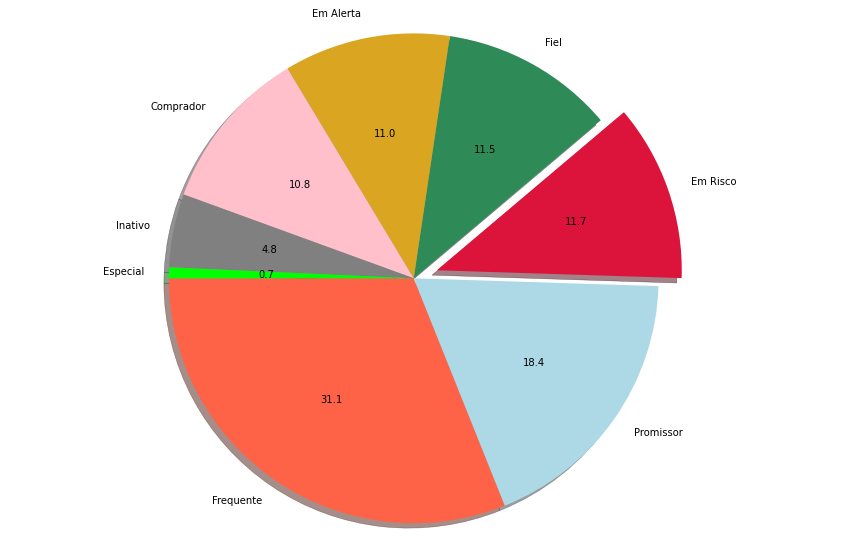

In [130]:
# Segmentação de clientes.
df_seg['Segmentation'].value_counts().plot.pie(startangle = 180,
                                               explode = (0, 0, 0.1, 0, 0, 0, 0, 0),
                                               autopct = '%.1f', 
                                               shadow = True, 
                                               ylabel = '',
                                               colors = ['tomato', 
                                                         'lightblue', 
                                                         'crimson', 
                                                         'seagreen',
                                                         'goldenrod', 
                                                         'pink', 
                                                         'gray', 
                                                         'lime', 
                                                         'violet'])
plt.axis('equal');

Se necessário também podemos filtrar o dataframe utilizando a coluna **`RFM_Score`**. 

Como vimos, ela possui uma maior diversificação dos segmentos. 

Por exemplo, podemos filtrar clientes do grupo 411.

In [131]:
# Clientes do grupo 411.
df_seg[(df_seg['RFM_Score'] == '411')].sort_values('M', ascending = False).head(10)

,R,F,M,R_Score,F_Score,M_Score,RFM_Score,RFM_Total_Score,Segmentation
Customer Id,,,,,,,,,
664,335,39,7549.040138,4,1,1,411,6,Em Alerta
4781,502,31,7258.970126,4,1,1,411,6,Em Alerta
9271,344,35,7012.680107,4,1,1,411,6,Em Alerta
1492,355,38,6934.600078,4,1,1,411,6,Em Alerta
773,326,34,6800.940094,4,1,1,411,6,Em Alerta
1695,326,33,6786.770100,4,1,1,411,6,Em Alerta
11065,309,41,6733.980038,4,1,1,411,6,Em Alerta
468,340,32,6569.600109,4,1,1,411,6,Em Alerta
7417,339,36,6471.100122,4,1,1,411,6,Em Alerta


Aqui, temos clientes que costumavam fazer pedidos em grandes quantidades e com muita frequência, mas que agora, não realizam pedidos há muito tempo. 

Isso pode significar que esses clientes estão migrando para outras empresas. Talvez seja interessante conversar com o departamento de Marketing para elaborar promoções especias a fim de recuperar esse grupo de clientes.

Por outro lado, temos os grupos com os clientes que compram com bastante frequencia e quantidade.

In [132]:
# Clientes dos grupos 144 ou 143.
df_seg[(df_seg['RFM_Score'] == '144')|(df_seg['RFM_Score'] == '143')].sort_values('M', ascending = False).head(10)

,R,F,M,R_Score,F_Score,M_Score,RFM_Score,RFM_Total_Score,Segmentation
Customer Id,,,,,,,,,
18053,39,1,1275.0,1,4,3,143,8,Promissor
18089,38,1,1275.0,1,4,3,143,8,Promissor
18071,39,1,1275.0,1,4,3,143,8,Promissor
18125,38,1,1275.0,1,4,3,143,8,Promissor
18035,39,1,1275.0,1,4,3,143,8,Promissor
18107,38,1,1275.0,1,4,3,143,8,Promissor
18070,39,1,1260.0,1,4,3,143,8,Promissor
18052,39,1,1260.0,1,4,3,143,8,Promissor
18124,38,1,1260.0,1,4,3,143,8,Promissor


Os clientes desses grupos tem boas chances de se tornarem os melhores clientes.

Aqui, o departamento de marketing deve aplicar esforços para fidelizar esses grupos.

## 6. Conclusões Finais

Para a construção do modelo de classificação, utilizamos o algoritmo de Regressão Logística. 

Após a preparação dos dados e a seleção das variáveis, conseguimos um *f1_score* de 98%. Apesar do bom desempenho, após a realização do *deploy* do modelo, vale a pena acompanhá-lo por algum tempo para certificar que o mesmo não esteja sobreajustado.

Também vale destacar que os dados de entrada devem passar pelos mesmos métodos de tratamento realizados no conjunto de treino.

O modelo poderia ser implementado de várias formas, como por exemplo:

- Alimentar uma aplicação web para que o cliente consiga utilizar o modelo da forma mais simples possível.
- Publicar o modelo em nuvem e entregá-lo como uma API.
- Salvar o modelo em disco e enviar para a equipe do cliente.

Devido ao bom desempenho do modelo, não foi necessário realizar a otimização dos hiperparâmetros, nem mesmo testamos outros algoritmos de classificação, o que poderia ser feito em um próximo ciclo.

Passando para o segundo problema de negócio, na segmentação dos clientes, utilizamos a análise RFM. Essa é uma boa alternativa para casos onde o conjunto de dados é muito grande e o poder computacional disponível é insuficiente para processá-los. 
Para a entrega do resultado da segmentação, poderíamos filtrar o conjunto de dados em subgrupos de acordo com os "*clusters*". 

Para finalizar, poderíamos realizar uma apresentação contendo os principais gráficos gerados durante a análise exploratória e uma breve explicação de todo o processo realizado até conclusão final do projeto.